# 1. Import libraries & import libraries

In [563]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [564]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

In [565]:
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [566]:
df=pd.read_csv('F:/DS/craigslist-used car raw data/vehicles.csv')

# 2. Data cleaning
## 2.1 check the information

In [567]:
df.shape

(509577, 25)

In [568]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [569]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

## 2.2 Drop the unnecessary columns

In [570]:
#drop the useless column
drop_columns=['county','url','region_url','vin','image_url','fuel','cylinders','lat','long','state','description','size','type']
df=df.drop(columns=drop_columns)

## 2.3 Deal with missing data

In [571]:
#check the isnull number
df.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
odometer         92324
title_status      3062
transmission      3719
drive           144143
paint_color     164706
dtype: int64

In [572]:
#fillter the columns need to be filled by float and object
for n in df.drop(['manufacturer','model','paint_color'],axis=1).columns:
    if df[n].dtype=='float':
        df[n]=df[n].fillna(df[n].mean())
    if df[n].dtype=='object':
        df[n]=df[n].fillna(df[n].mode()[0])

In [573]:
#fill other columns
df['year']=df['year'].fillna(df['year'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna('unkonwn')
df['model']=df['model'].fillna('unknown')
df['paint_color']=df['paint_color'].fillna('unknown')

In [574]:
#check the isnull number
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
dtype: int64

In [575]:
#change the 'year' type into int
df['year']=df['year'].astype('int')

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 12 columns):
id              509577 non-null int64
region          509577 non-null object
price           509577 non-null int64
year            509577 non-null int32
manufacturer    509577 non-null object
model           509577 non-null object
condition       509577 non-null object
odometer        509577 non-null float64
title_status    509577 non-null object
transmission    509577 non-null object
drive           509577 non-null object
paint_color     509577 non-null object
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 44.7+ MB


## 2.4 Drop the fake data

In [577]:
#replace the 0 value by median
df['price']=df['price'].replace(0,df['price'].median())
df['odometer']=df['odometer'].replace(0,df['odometer'].median())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


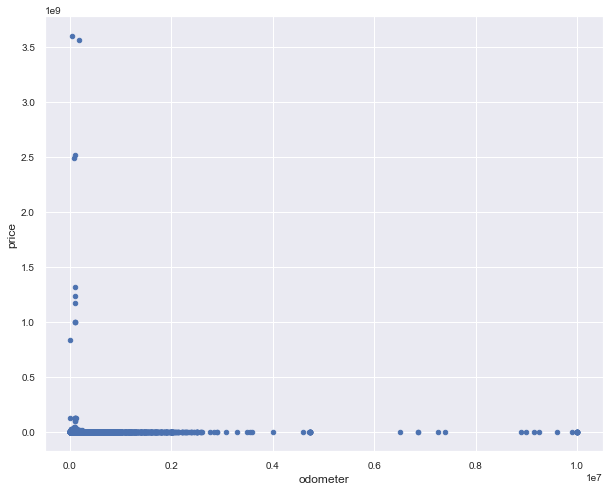

In [578]:
#check the fake max data
df.plot(kind='scatter',x='odometer',y='price',figsize=(10, 8))

In [579]:
df['price'].max()

3600028900

In [580]:
#set a gross range of samples
clean_data=df[df['price']<200000]
clean_data=clean_data[clean_data['odometer']<300000]

In [581]:
#replace the fake min data by median
clean_data['price']=clean_data['price'].replace(0,clean_data['price'].median())
clean_data['odometer']=clean_data['odometer'].replace(0,clean_data['odometer'].median())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


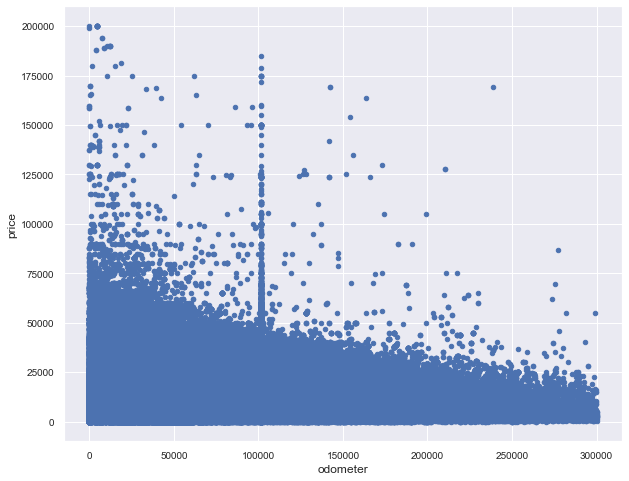

In [582]:
clean_data.plot(kind='scatter',x='odometer',y='price',figsize=(10, 8))

In [592]:
clean_data.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class
0,7034441763,salt lake city,17899,2012,volkswagen,golf r,excellent,63500.0,clean,manual,4wd,black,low odometer
1,7034440610,salt lake city,9377,2016,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer
2,7034440588,salt lake city,46463,2015,gmc,sierra 1500,excellent,7554.0,clean,automatic,4wd,white,low odometer
3,7034440546,salt lake city,9377,2016,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer
4,7034406932,salt lake city,49999,2018,ford,f-450,excellent,70150.0,clean,automatic,4wd,white,low odometer


In [595]:
#devide the odometer into three classes
class_div=(clean_data['odometer'].max()-clean_data['odometer'].min())//3
class1=clean_data['odometer'].min()+class_div
class2=class1+class_div
class3=class2+class_div

In [596]:
print(class_div)
print(class1)
print(class2)
print(class3)
print(clean_data['odometer'].min)

99999.0
100000.0
199999.0
299998.0
<bound method Series.min of 0          63500.0
1             10.0
2           7554.0
3             10.0
4          70150.0
            ...   
509572    103135.0
509573    108277.0
509574      6973.0
509575     37520.0
509576    152296.0
Name: odometer, Length: 506631, dtype: float64>


In [597]:
def odometer_class(n):
    if n<class1:
        return 'low odometer'
    if n>class1 and n<class2:
        return'medium odometer'
    else:
        return'high odometer'
clean_data['odometer_class']=clean_data['odometer'].apply(odometer_class)

In [598]:
clean_data[['odometer_class','odometer','price']].head(10)

,odometer_class,odometer,price
0,low odometer,63500.0,17899
1,low odometer,10.0,9377
2,low odometer,7554.0,46463
3,low odometer,10.0,9377
4,low odometer,70150.0,49999
5,medium odometer,120057.0,13999
6,low odometer,95484.0,34500
7,low odometer,89340.0,14500
8,high odometer,226031.0,12500
9,medium odometer,128153.0,34500


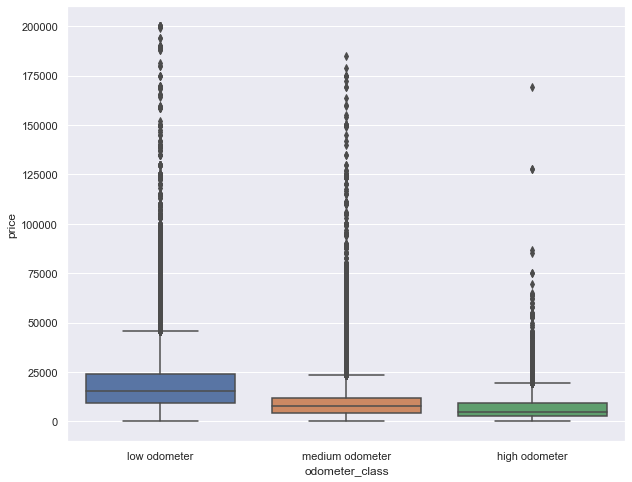

In [599]:
#detecting outlier by box chart
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot(x='odometer_class', y='price', data=clean_data)

In [600]:
#get the iqr of price
from scipy.stats import iqr
iqr=iqr(clean_data['price'])
iqr

12173.0

In [601]:
price_stats=clean_data['price'].describe()
price_stats

count    506631.000000
mean      13270.652925
std       11160.537842
min           1.000000
25%        5777.000000
50%        9400.000000
75%       17950.000000
max      199997.000000
Name: price, dtype: float64

In [602]:
#get the upper and lower bound
Q3=price_stats['75%']
upper_bound=Q3+(iqr*1.5)
Q1=price_stats['25%']
lower_bound=Q1-(iqr*1.5)
print(upper_bound)
print(lower_bound)

36209.5
-12482.5


In [603]:
outlier_above=[n for n in clean_data['price'].values if n>upper_bound]

In [604]:
#delete outliers
clean_data=clean_data[~clean_data['price'].isin(outlier_above)]

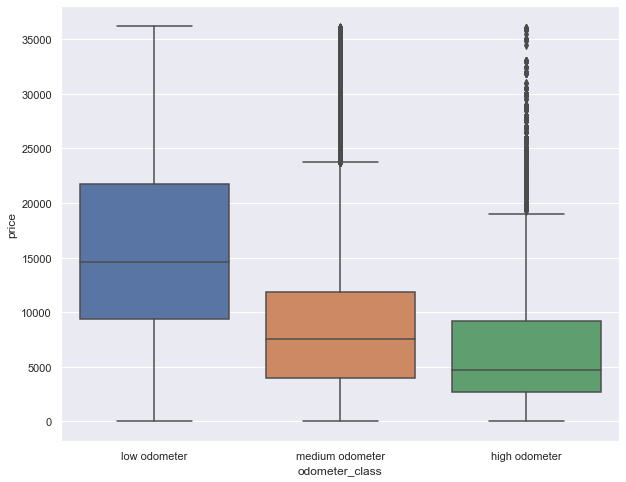

In [605]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot(x='odometer_class', y='price', data=clean_data)

In [606]:
#devide the price into three levels
price_div=(clean_data['price'].max()-clean_data['price'].min())//3
price_class1=clean_data['price'].min()+price_div
price_class2=price_class1+price_div
price_class3=price_class2+price_div

In [607]:
print(clean_data['price'].max())
print(clean_data['price'].min())
print(price_div)
print(price_class1)
print(price_class2)
print(price_class3)


36200
1
12066
12067
24133
36199


In [608]:
def price_class(n):
    if n<price_class1:
        return 'low price'
    if n>price_class1 and n<price_class2:
        return'medium price'
    else:
        return'high price'
clean_data['price_class']=clean_data['price'].apply(price_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [609]:
clean_data.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
0,7034441763,salt lake city,17899,2012,volkswagen,golf r,excellent,63500.0,clean,manual,4wd,black,low odometer,medium price
1,7034440610,salt lake city,9377,2016,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer,low price
3,7034440546,salt lake city,9377,2016,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer,low price
5,7034406582,salt lake city,13999,2009,ram,unknown,excellent,120057.0,clean,automatic,4wd,silver,medium odometer,medium price
6,7034405619,salt lake city,34500,2017,ford,f-350,excellent,95484.0,clean,automatic,4wd,white,low odometer,high price


# 3.visualization

In [610]:
clean_data.head(10)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
0,7034441763,salt lake city,17899,2012,volkswagen,golf r,excellent,63500.0,clean,manual,4wd,black,low odometer,medium price
1,7034440610,salt lake city,9377,2016,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer,low price
3,7034440546,salt lake city,9377,2016,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer,low price
5,7034406582,salt lake city,13999,2009,ram,unknown,excellent,120057.0,clean,automatic,4wd,silver,medium odometer,medium price
6,7034405619,salt lake city,34500,2017,ford,f-350,excellent,95484.0,clean,automatic,4wd,white,low odometer,high price
7,7034405349,salt lake city,14500,2007,gmc,sierra,excellent,89340.0,clean,automatic,4wd,unknown,low odometer,medium price
8,7034404595,salt lake city,12500,2013,ford,f-250,excellent,226031.0,clean,automatic,4wd,white,high odometer,medium price
9,7034401857,salt lake city,34500,2012,ram,unknown,excellent,128153.0,clean,automatic,4wd,silver,medium odometer,high price
10,7034401494,salt lake city,5900,1994,ford,f-250,excellent,168838.0,clean,manual,4wd,white,medium odometer,low price
11,7034400341,salt lake city,16500,2013,gmc,yukon,excellent,156385.0,clean,automatic,4wd,silver,medium odometer,medium price


## all manufacturers during the whole period
### average odometer of each manufacturer 

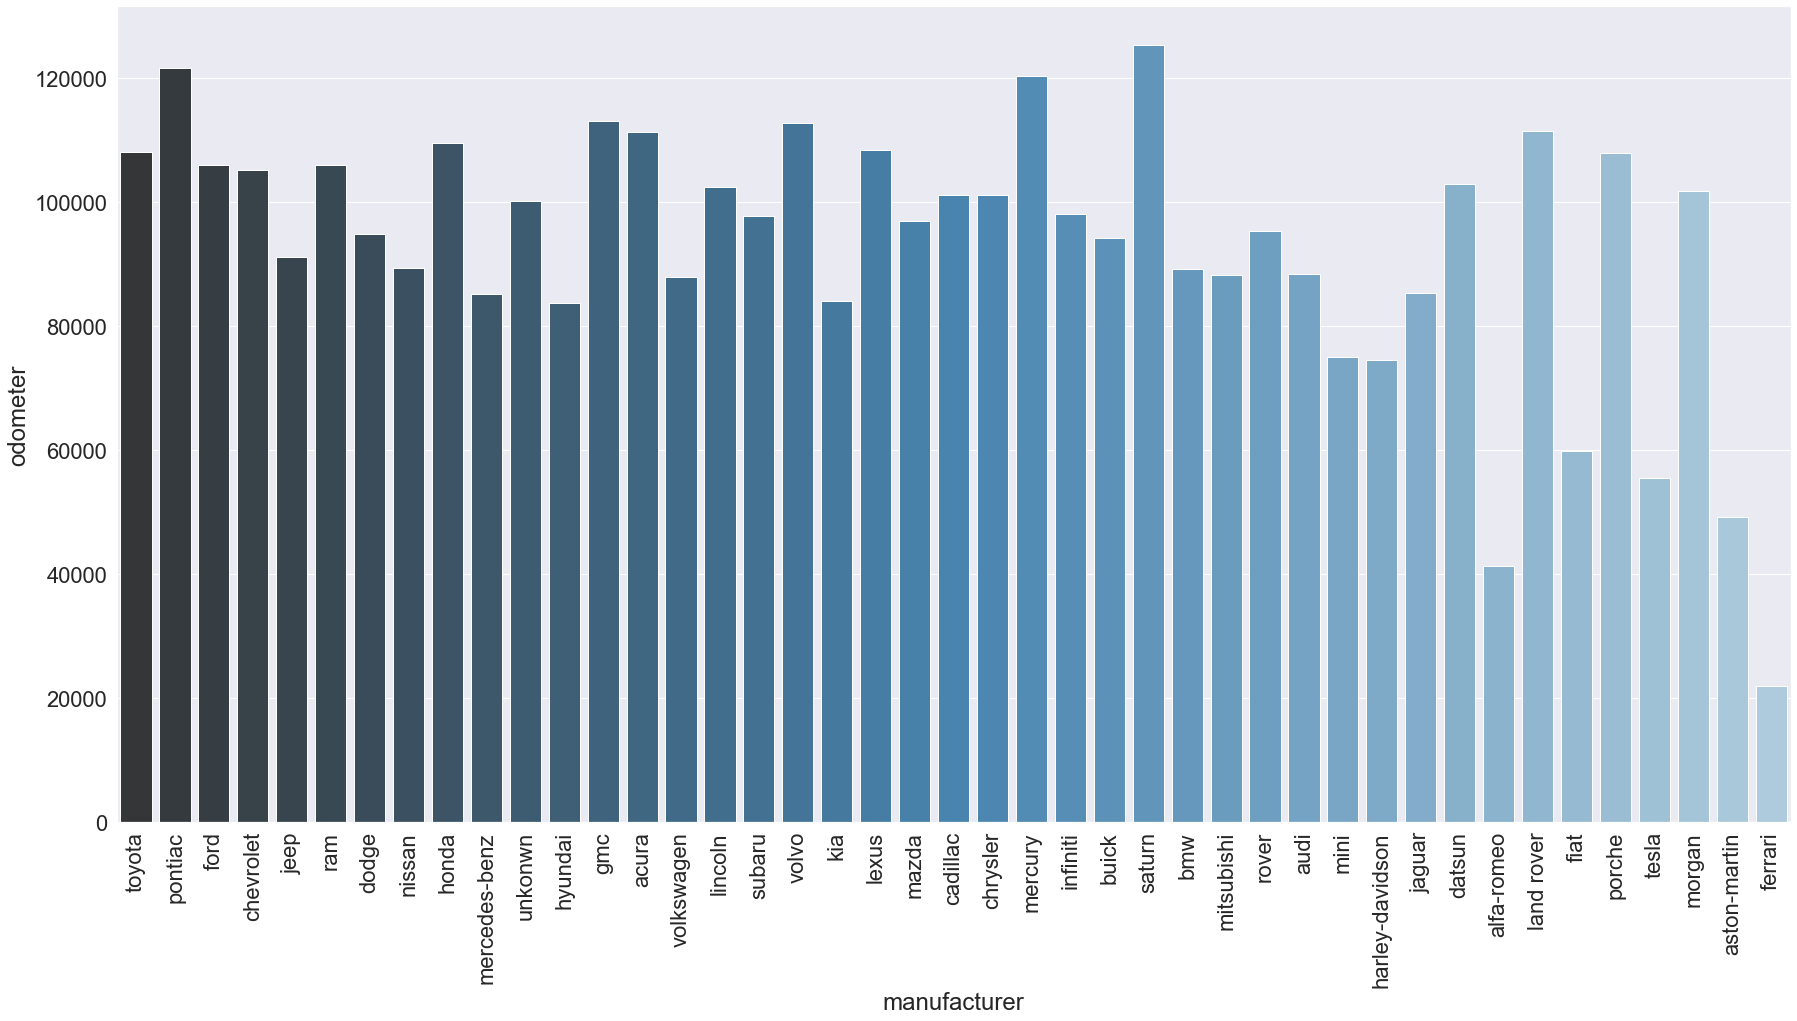

In [611]:
odometer_manufacturer=clean_data.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(30,15))
sns.despine()
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
sns.barplot(x=odometer_manufacturer.manufacturer, palette="Blues_d",y=odometer_manufacturer.odometer,ci=None)
plt.show()


From the bar chart we could know that **Saturn** have the most miles when they are on second-hand sale.

### average price of each manufacturer  

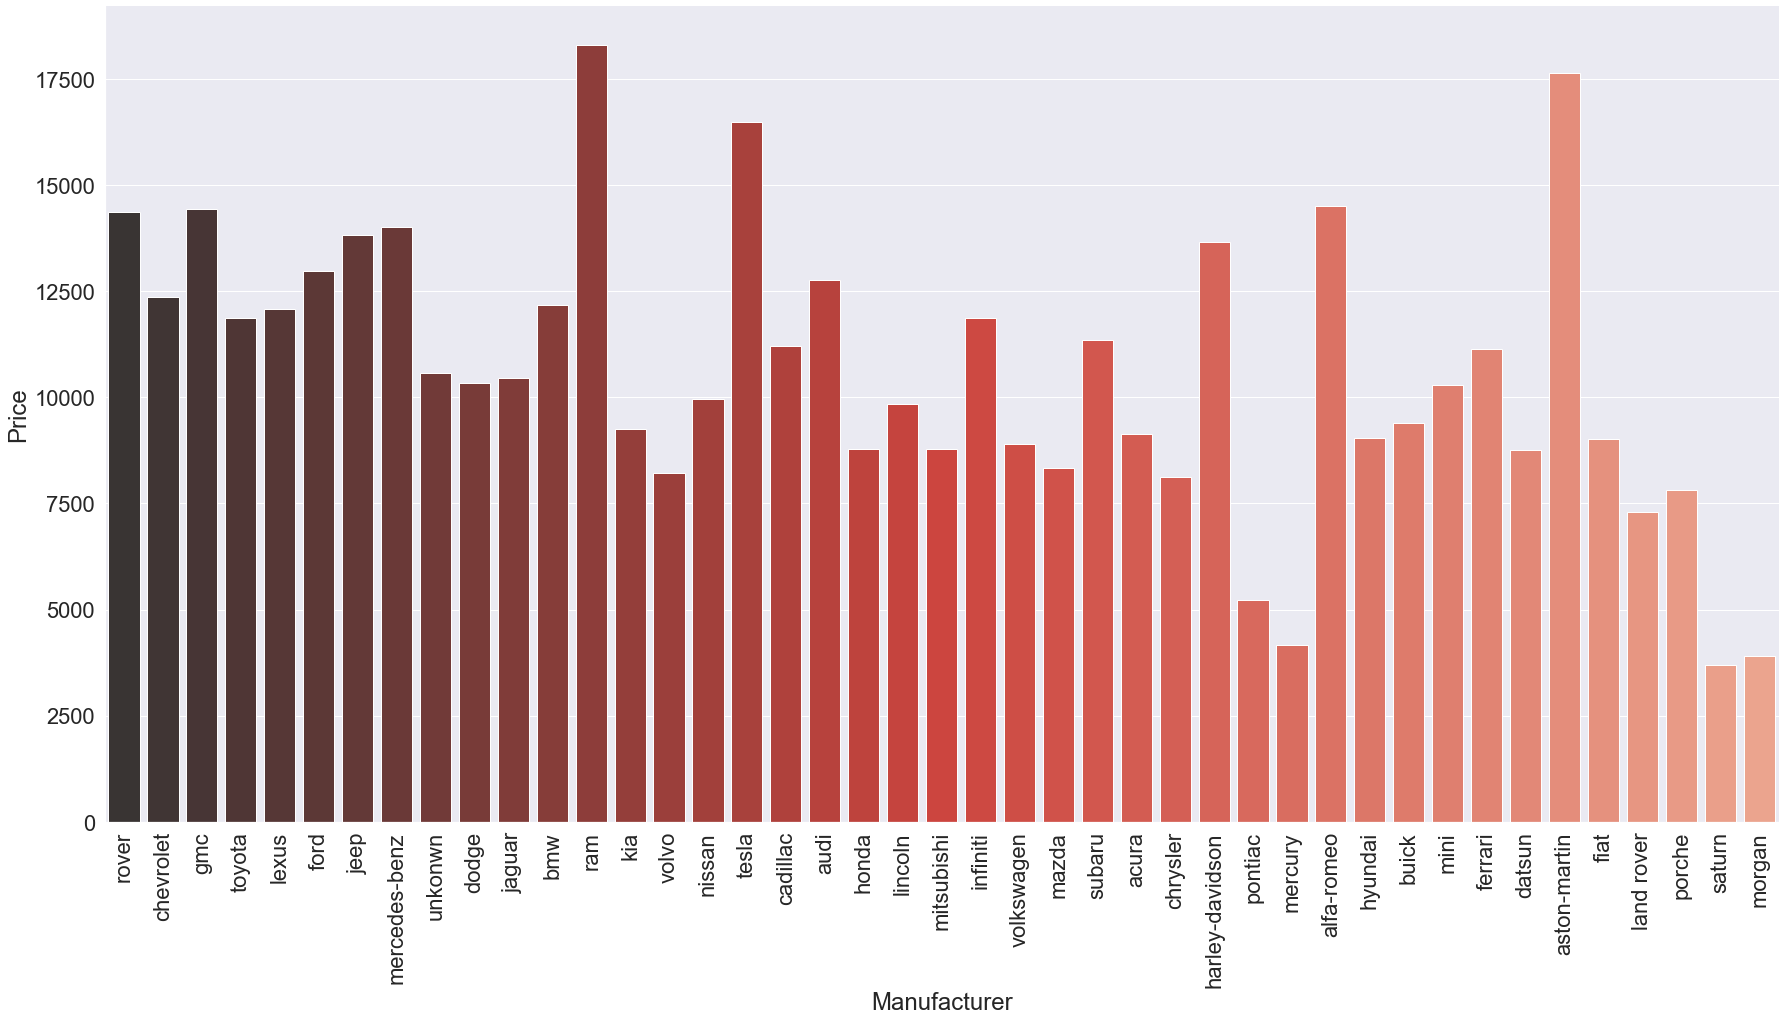

In [612]:
price_manufacturer=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=price_manufacturer.manufacturer, palette="Reds_d",y=price_manufacturer.price,ci=None)
sns.despine()
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

We could know that among used cars, **ram** usually has the average highest price.

### average condition of each manufacturer  

In [613]:
clean_data.condition.value_counts(normalize='True')

excellent    0.728404
good         0.195111
like new     0.053960
fair         0.018767
new          0.002373
salvage      0.001385
Name: condition, dtype: float64

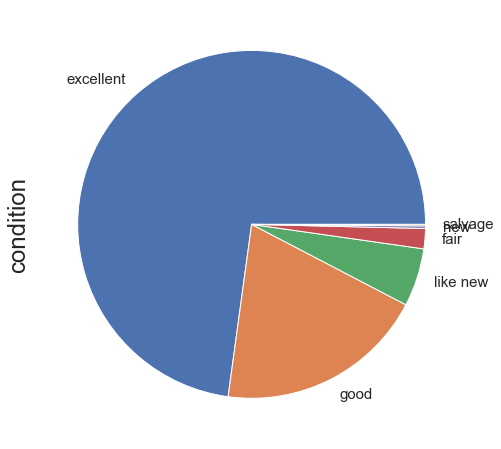

In [614]:

clean_data.condition.value_counts().plot(figsize=(10, 8),kind='pie',fontsize= 15)


In [615]:
allcondition=clean_data.groupby('condition').price_class.value_counts(normalize=True)
allcondition

condition  price_class 
excellent  low price       0.596495
           medium price    0.286414
           high price      0.117091
fair       low price       0.979491
           medium price    0.019193
           high price      0.001316
good       low price       0.687669
           medium price    0.245345
           high price      0.066985
like new   low price       0.558912
           medium price    0.314071
           high price      0.127017
new        low price       0.674761
           medium price    0.203816
           high price      0.121422
salvage    low price       0.955423
           medium price    0.040119
           high price      0.004458
Name: price_class, dtype: float64

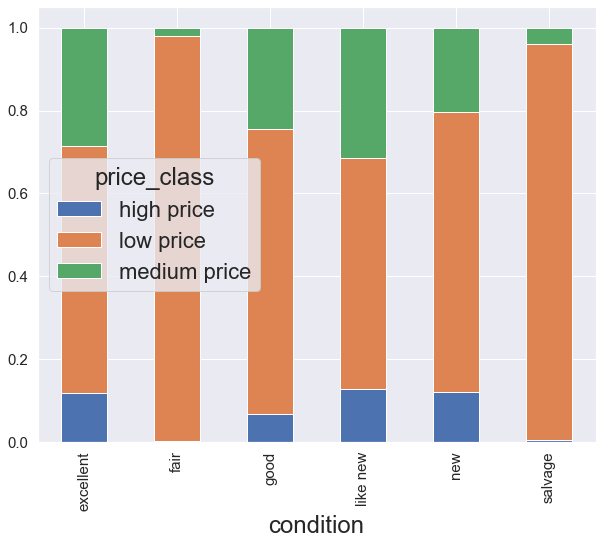

In [616]:
allcondition.unstack().plot(kind='bar',figsize=(10, 8),stacked=True,fontsize= 15)

### Drive share of the market

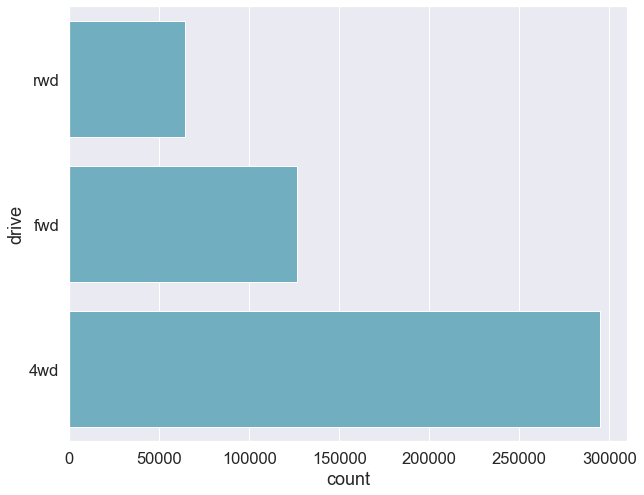

In [617]:
clean_data=clean_data.sort_values(by=['drive'],ascending=False)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.despine()
sns.countplot(y='drive',data=clean_data,color='c')
plt.show()

### color  share of the market

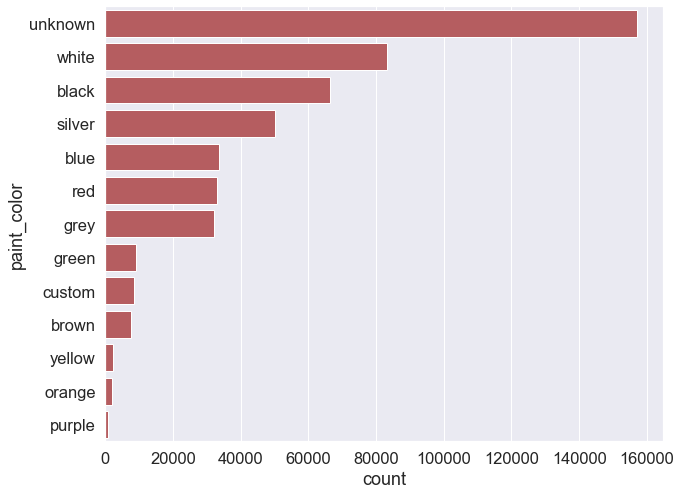

In [618]:
clean_data=clean_data.sort_values(by=['paint_color'],ascending=False)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.despine()
sns.countplot(y='paint_color',data=clean_data,color='r',order = clean_data['paint_color'].value_counts().index)

plt.show()

### Which color usually has a higher price 

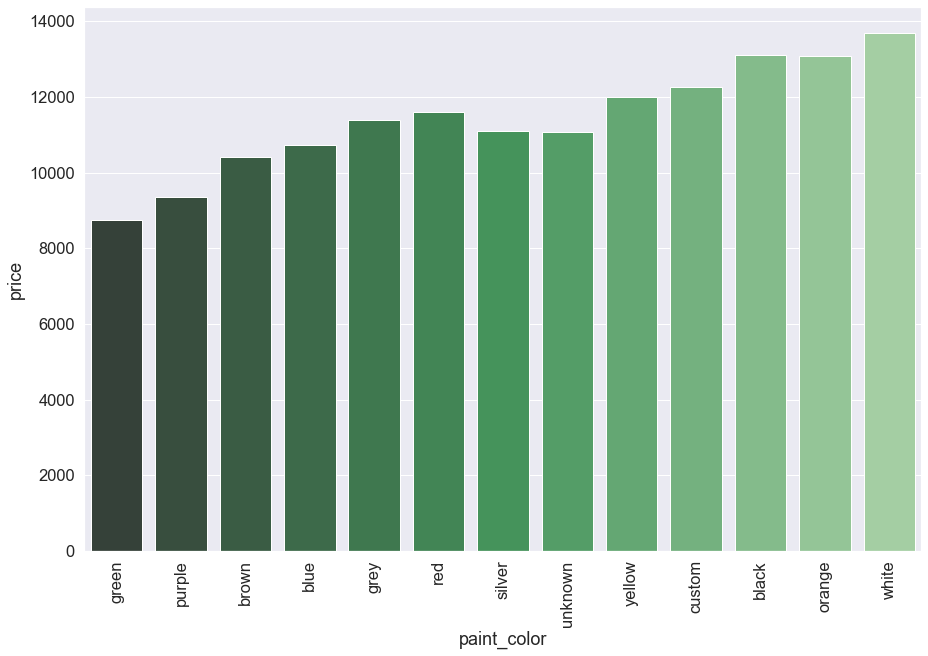

In [619]:
result = clean_data.groupby(['paint_color'])['price'].aggregate(np.median).reset_index().sort_values('price')
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.despine()
plt.xticks(rotation= 90)
plt.xlabel('paint color')
plt.ylabel('Price')
sns.barplot(x="paint_color", y="price", data=clean_data, order=result['paint_color'],palette='Greens_d',ci=None)
plt.show()

### relationship between price class and color

In [620]:
allcolor=clean_data.groupby('paint_color').price_class.value_counts(normalize=True)
allcolor

paint_color  price_class 
black        low price       0.551344
             medium price    0.321386
             high price      0.127270
blue         low price       0.667957
             medium price    0.257647
             high price      0.074396
brown        low price       0.690318
             medium price    0.223607
             high price      0.086074
custom       low price       0.576982
             medium price    0.313195
             high price      0.109823
green        low price       0.765473
             medium price    0.174975
             high price      0.059552
grey         low price       0.649904
             medium price    0.259080
             high price      0.091016
orange       low price       0.527723
             medium price    0.352475
             high price      0.119802
purple       low price       0.751244
             medium price    0.171642
             high price      0.077114
red          low price       0.626780
             medium pric

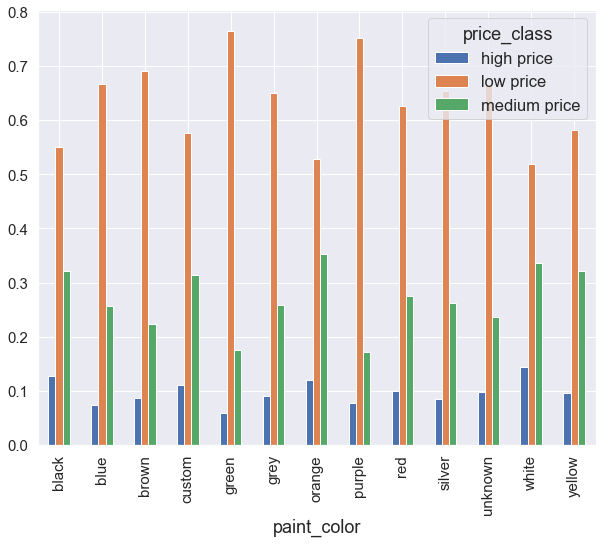

In [728]:
allcolor.unstack().plot(kind='bar',figsize=(10, 8),fontsize= 15)



## RAM data analysis during the whole period

### average price trend of Ram

In [622]:
#get the data of Ram
ram_data=clean_data.loc[clean_data['manufacturer']=='ram']

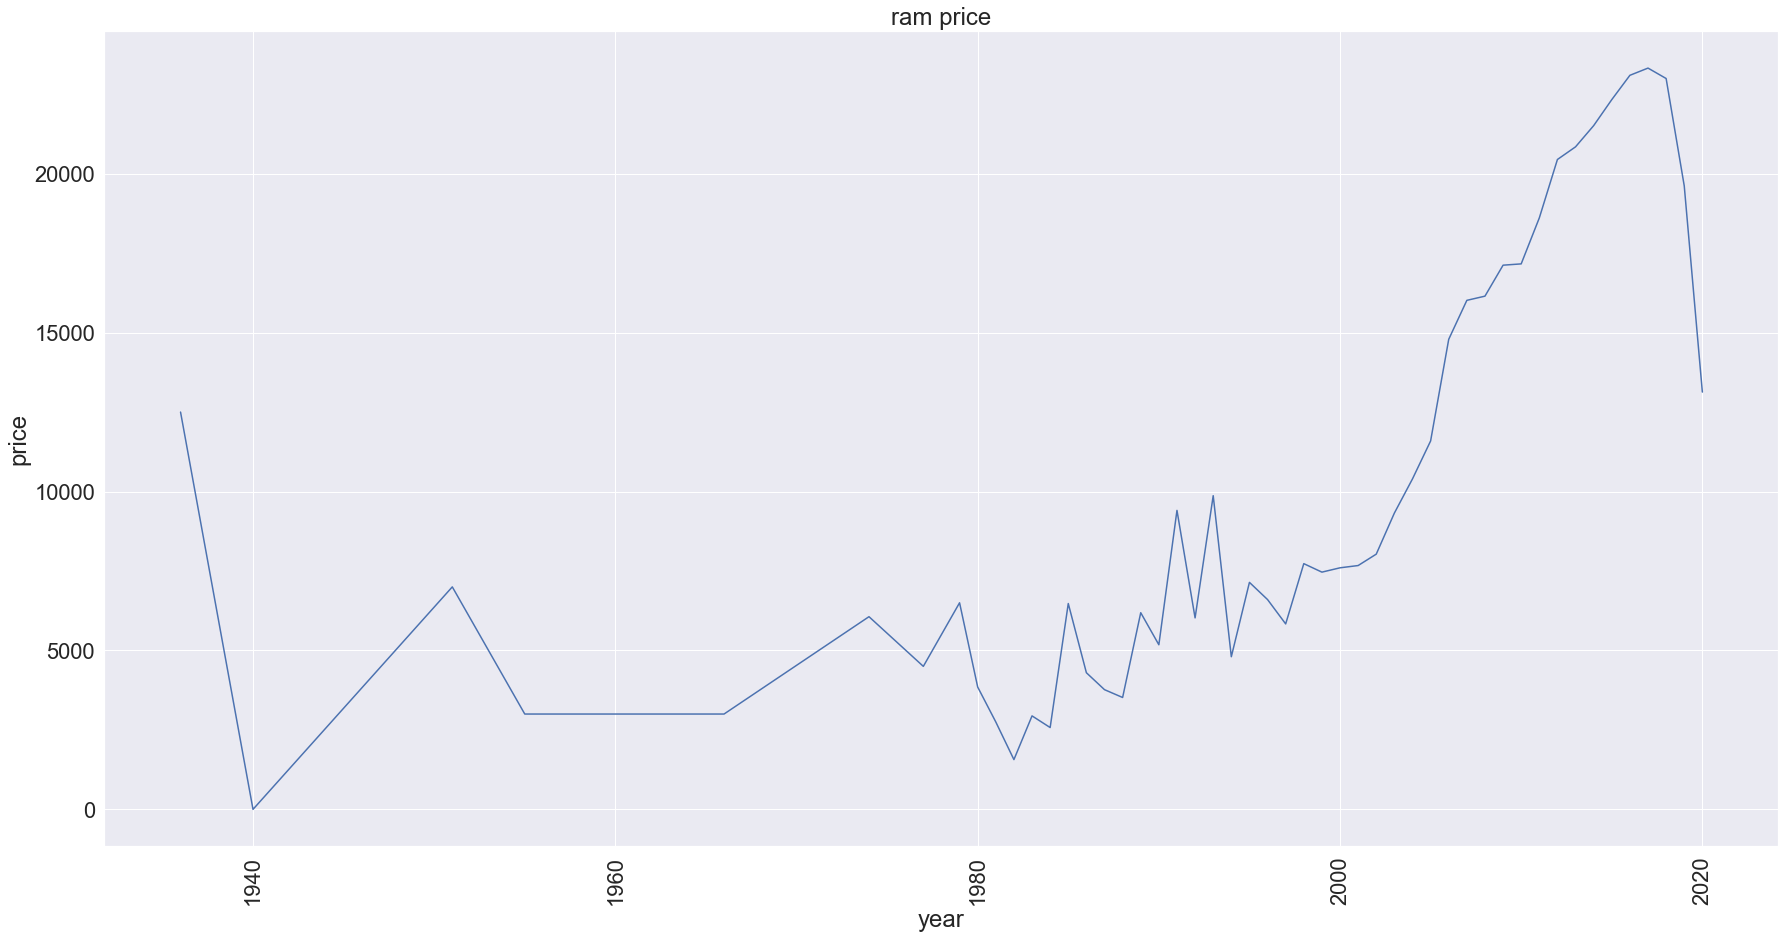

In [623]:
#get the price trend of Ram
ram_data=ram_data.sort_values(by=['price'],ascending=False)

plt.figure(figsize=(30,15))
sns.despine()
sns.set(font_scale=2)
plt.title('ram price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
sns.lineplot(x=ram_data.year, y=ram_data.price, ci=None)
plt.show()

### popular color of Ram

In [624]:
ram_data.paint_color.value_counts()

unknown    7548
white      5506
black      2975
silver     1904
red        1770
grey       1275
blue       1240
custom      428
brown       271
green       262
orange       65
yellow       65
purple       27
Name: paint_color, dtype: int64

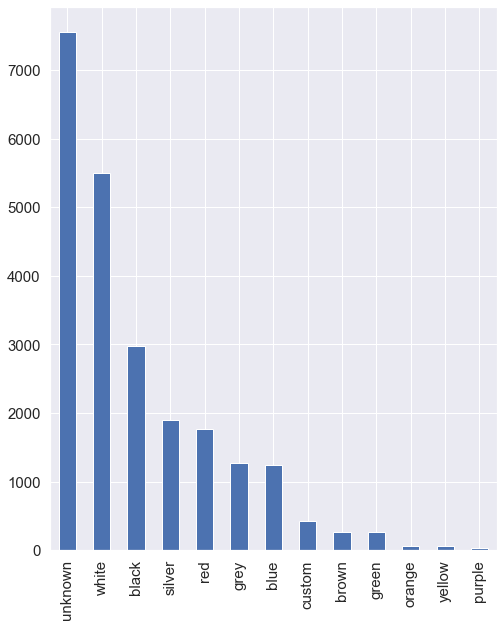

In [625]:
ram_data.paint_color.value_counts().plot(kind='bar',figsize=(8, 10),fontsize= 15)

In [626]:
#check ram model species
ram_data.model.value_counts()

1500                                     6998
2500                                     3130
unknown                                  2367
3500                                     1540
1500 4x4                                  366
                                         ... 
1500 big horn hemi                          1
pickup 3500 tradesman                       1
1500 slt nice - removable ladder rack       1
3500 slt 4dr quad cab slt                   1
tradesman city van                          1
Name: model, Length: 1302, dtype: int64

In [627]:
#replace duplacted species
ram_data.loc[ram_data['model'].str.contains('1500')]='1500'
ram_data.loc[ram_data['model'].str.contains('2500')]='2500'
ram_data.loc[ram_data['model'].str.contains('3500')]='3500'
ram_data.loc[ram_data['model'].str.contains('5500')]='5500'
ram_data.loc[ram_data['model'].str.contains('4500')]='4500'
ram_data.loc[ram_data['model'].str.contains('promaster')]='promaster'
ram_data.loc[ram_data['model'].str.contains('cargo van')]='promaster'

In [628]:
ram_data.model.value_counts(normalize=True)

1500                      0.509170
2500                      0.224589
3500                      0.108716
unknown                   0.101431
promaster                 0.019369
                            ...   
magnum                    0.000043
dakota extended cab       0.000043
slt swb                   0.000043
deisel 5.9l cummins hd    0.000043
tradesman city van        0.000043
Name: model, Length: 210, dtype: float64

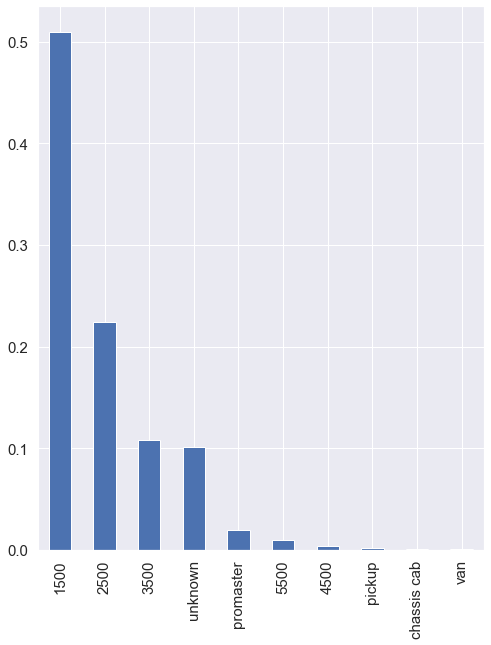

In [629]:
#pick the top 10 model species
ram_data.model.value_counts(normalize=True).head(10).plot(kind='bar',figsize=(8, 10),fontsize= 15)


## all manufacturers of the past 20 years
### average price trend of  the past 20 years

In [630]:
#pivot tha data frame by years
year_odometer_price=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
year_odometer_price=year_odometer_price.pivot_table(year_odometer_price,index=['year'],aggfunc=[np.mean])

year_odometer_price.head(10)                  
year_odometer_price.columns

MultiIndex([('mean',       'id'),
            ('mean', 'odometer'),
            ('mean',    'price')],
           )

In [631]:
year_odometer_price

mean                             
                id       odometer         price
year                                           
2001  7.044453e+09  137758.973299   5137.754151
2002  7.044369e+09  137234.937128   5344.118445
2003  7.044303e+09  136611.685462   5801.464062
2004  7.044279e+09  135082.318286   6220.640418
2005  7.044396e+09  134852.362989   6465.769838
2006  7.044422e+09  132296.328742   7329.867035
2007  7.044322e+09  130216.087599   7734.341237
2008  7.044296e+09  127538.309414   8522.427744
2009  7.044272e+09  117546.332440   9203.321049
2010  7.044161e+09  117416.454636   9715.528637
2011  7.044153e+09  112672.021400  11878.893189
2012  7.044153e+09  106634.997426  12234.328520
2013  7.044192e+09   98236.779024  13242.642845
2014  7.044064e+09   88525.791651  15178.643260
2015  7.044002e+09   77832.492055  16978.678051
2016  7.043986e+09   58907.676691  17695.634631
2017  7.044106e+09   47898.876442  18361.900664
2018  7.043829e+09   37267.544863  18403.178121
2019  7.044124e+09   30202.699965  18508.734249

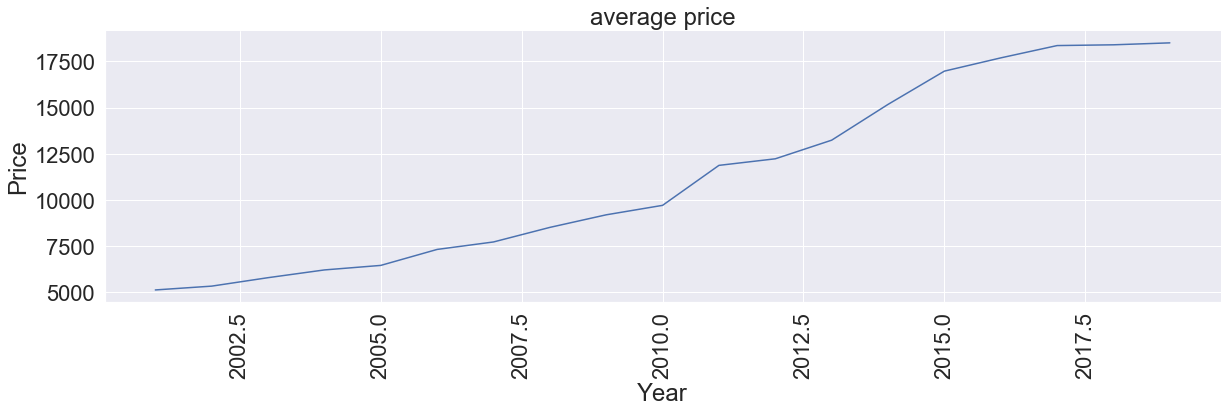

In [632]:
#the price trend
plt.figure(figsize=(20,5))
sns.lineplot(x=year_odometer_price.index, y=year_odometer_price['mean']['price'], ci=None)
sns.despine()
plt.title('average price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### average odometer trend of  the past 20 years

<Figure size 432x288 with 0 Axes>

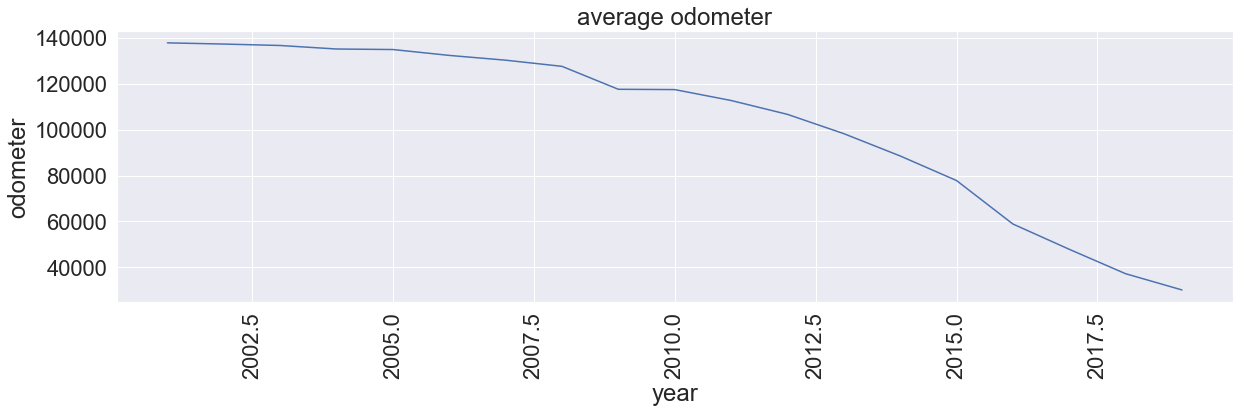

In [633]:
sns.despine()
plt.figure(figsize=(20,5))
plt.title('average odometer')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Odometer')
sns.lineplot(x=year_odometer_price.index, y=year_odometer_price['mean']['odometer'],ci=None)
plt.show()

### the price trend of the most popolar 5 manufacturers in the past 20 years

In [634]:
#get the the most popolar 5 manufacturers 
#the 5 most popular manufacturer in uesed car market are 'ford','chevrolet','toyota','nissan','honda'
twenty_year=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
twenty_year['manufacturer'].value_counts().head(5)

ford         78741
chevrolet    62621
toyota       34662
nissan       25558
honda        24095
Name: manufacturer, dtype: int64

In [635]:
twenty_year['manufacturer'].value_counts(normalize='True').head(5)

ford         0.175761
chevrolet    0.139779
toyota       0.077370
nissan       0.057049
honda        0.053783
Name: manufacturer, dtype: float64

In [636]:
x=twenty_year['manufacturer'].value_counts(normalize='True').head(5)

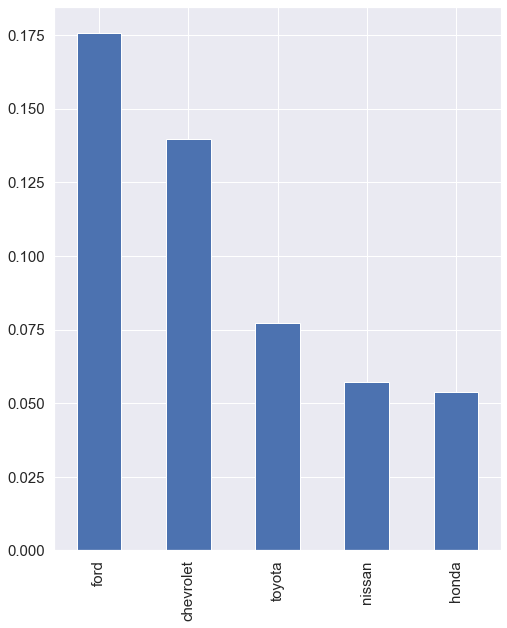

In [637]:
#the rank of market share of the 5 manufactures
x.plot(kind='bar',figsize=(8, 10),fontsize= 15)

In [638]:
#get the ford price trend
ford_out=twenty_year[twenty_year['manufacturer']=='ford']
ford_average=ford_out.pivot_table(ford_out,index=['year'],aggfunc=[np.mean])
ford_average.columns=[ 'ford_id','ford_odometer','ford_price']

In [639]:
#get the chevrolet price trend
chevrolet_out=twenty_year[twenty_year['manufacturer']=='chevrolet']
chevrolet_average=chevrolet_out.pivot_table(chevrolet_out,index=['year'],aggfunc=[np.mean])
chevrolet_average.columns=[ 'chevrolet_id','chevrolet_odometer','chevrolet_price']

In [640]:
#get the toyota price trend
toyota_out=twenty_year[twenty_year['manufacturer']=='toyota']
toyota_average=toyota_out.pivot_table(toyota_out,index=['year'],aggfunc=[np.mean])
toyota_average.columns=[ 'toyota_id','toyota_odometer','toyota_price']

In [641]:
#get the cnissan price trend
nissan_out=twenty_year[twenty_year['manufacturer']=='nissan']
nissan_average=nissan_out.pivot_table(nissan_out,index=['year'],aggfunc=[np.mean])
nissan_average.columns=[ 'nissan_id','nissan_odometer','nissan_price']

In [642]:
#get the honta price trend
honda_out=twenty_year[twenty_year['manufacturer']=='honda']
honda_average=honda_out.pivot_table(honda_out,index=['year'],aggfunc=[np.mean])
honda_average.columns=[ 'honda_id','honda_odometer','honda_price']

In [643]:
#concat the 5 data frame
car_price_concat = pd.concat([ford_average,chevrolet_average,toyota_average,nissan_average,honda_average], axis=1)
car_price_concat.head(5)

,ford_id,ford_odometer,ford_price,chevrolet_id,chevrolet_odometer,chevrolet_price,toyota_id,toyota_odometer,toyota_price,nissan_id,nissan_odometer,nissan_price,honda_id,honda_odometer,honda_price
year,,,,,,,,,,,,,,,
2001,7.044392e+09,140581.564525,6592.115610,7.044192e+09,135614.322653,5848.407908,7.044823e+09,154978.857310,4500.066757,7.044844e+09,133279.378980,3230.258537,7.045209e+09,144391.526023,2835.737527
2002,7.044162e+09,139119.329111,7375.414519,7.043957e+09,136996.503325,5895.889187,7.044795e+09,156105.383855,4917.869364,7.044870e+09,145476.279888,3585.100000,7.045061e+09,146196.788072,3037.560490
2003,7.044070e+09,135937.458380,6689.972539,7.043975e+09,141353.646643,6530.527163,7.044863e+09,145517.827355,5278.194129,7.044251e+09,130099.736624,4160.818182,7.044496e+09,151838.048529,3442.586957
2004,7.044148e+09,133873.045708,7502.260134,7.043913e+09,138849.065902,7351.288408,7.044705e+09,149030.822064,5753.047428,7.044942e+09,132869.844792,4706.073718,7.044504e+09,147962.913261,3890.267633
2005,7.044347e+09,134964.530447,7402.027806,7.043827e+09,139461.666605,7550.457559,7.044795e+09,146578.723848,6338.092953,7.044443e+09,132903.684812,4541.584229,7.044727e+09,147293.522838,4122.483572


In [644]:
car_price_concat.index.astype(int)

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='year')

In [645]:
#filter the year of past 20 years
car_price_trend=car_price_concat.loc[(car_price_concat.index>2000)&(car_price_concat.index<2020)]

In [646]:
car_price_trend.head(5)

,ford_id,ford_odometer,ford_price,chevrolet_id,chevrolet_odometer,chevrolet_price,toyota_id,toyota_odometer,toyota_price,nissan_id,nissan_odometer,nissan_price,honda_id,honda_odometer,honda_price
year,,,,,,,,,,,,,,,
2001,7.044392e+09,140581.564525,6592.115610,7.044192e+09,135614.322653,5848.407908,7.044823e+09,154978.857310,4500.066757,7.044844e+09,133279.378980,3230.258537,7.045209e+09,144391.526023,2835.737527
2002,7.044162e+09,139119.329111,7375.414519,7.043957e+09,136996.503325,5895.889187,7.044795e+09,156105.383855,4917.869364,7.044870e+09,145476.279888,3585.100000,7.045061e+09,146196.788072,3037.560490
2003,7.044070e+09,135937.458380,6689.972539,7.043975e+09,141353.646643,6530.527163,7.044863e+09,145517.827355,5278.194129,7.044251e+09,130099.736624,4160.818182,7.044496e+09,151838.048529,3442.586957
2004,7.044148e+09,133873.045708,7502.260134,7.043913e+09,138849.065902,7351.288408,7.044705e+09,149030.822064,5753.047428,7.044942e+09,132869.844792,4706.073718,7.044504e+09,147962.913261,3890.267633
2005,7.044347e+09,134964.530447,7402.027806,7.043827e+09,139461.666605,7550.457559,7.044795e+09,146578.723848,6338.092953,7.044443e+09,132903.684812,4541.584229,7.044727e+09,147293.522838,4122.483572


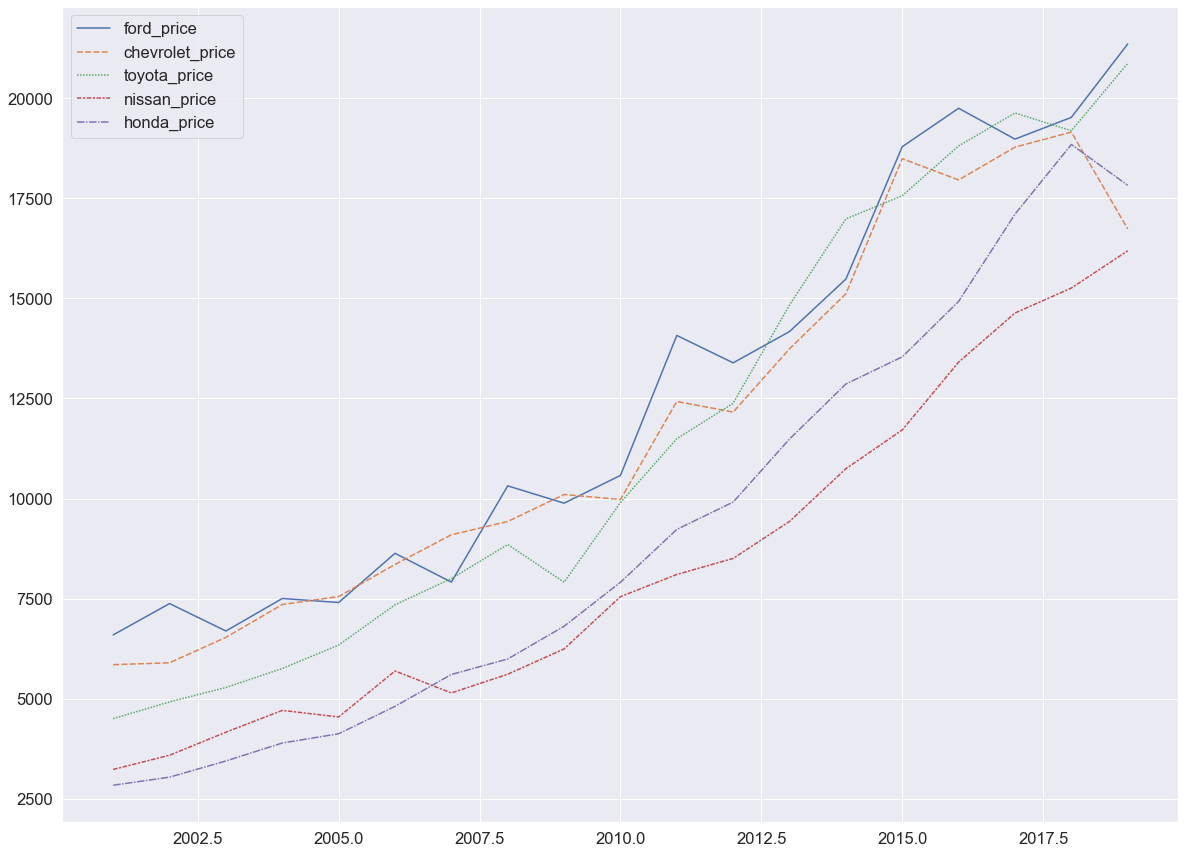

In [669]:
#line plot
dd=[car_price_trend['ford_price'],car_price_trend['chevrolet_price'],car_price_trend['toyota_price'],car_price_trend['nissan_price'],car_price_trend['honda_price']]
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
sns.lineplot(data=dd)

### Pick the most popular five manufacturers and compare their market shares in the past 20 years

In [670]:
#filter the year
five_car_20=clean_data[(clean_data['year']>2000)&(clean_data['year']<2020)]


In [671]:
df=pd.DataFrame(data=five_car_20)

In [672]:
#filter the manufacturers
df=df.loc[(five_car_20['manufacturer']=='ford')|(df['manufacturer']=='chevrolet')|(df['manufacturer']=='toyota')|(df['manufacturer']=='nissan')|(df['manufacturer']=='honda')]
df.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
225061,7046980271,indianapolis,3850,2011,chevrolet,cruze,excellent,101729.961515,clean,automatic,4wd,yellow,medium odometer,low price
156725,7036994153,daytona beach,19300,2016,ford,mustang ecoboost premium,good,52408.000000,clean,automatic,rwd,yellow,low odometer,medium price
136199,7049522243,denver,15590,2018,ford,escape,excellent,21636.000000,clean,automatic,fwd,yellow,low odometer,medium price
365636,7037074377,albany,19997,2002,ford,f-150,excellent,65035.000000,clean,automatic,4wd,yellow,low odometer,medium price
104460,7049359877,redding,11985,2006,chevrolet,corvette,excellent,160175.000000,clean,automatic,rwd,yellow,medium odometer,low price


In [673]:
df2=df.groupby([ 'year','manufacturer']).size()

year  manufacturer
2001  chevrolet        961
      ford            1704
      honda            461
      nissan           205
      toyota           734
                      ... 
2019  chevrolet       1151
      ford            1652
      honda            302
      nissan           850
      toyota           792
Length: 95, dtype: int64

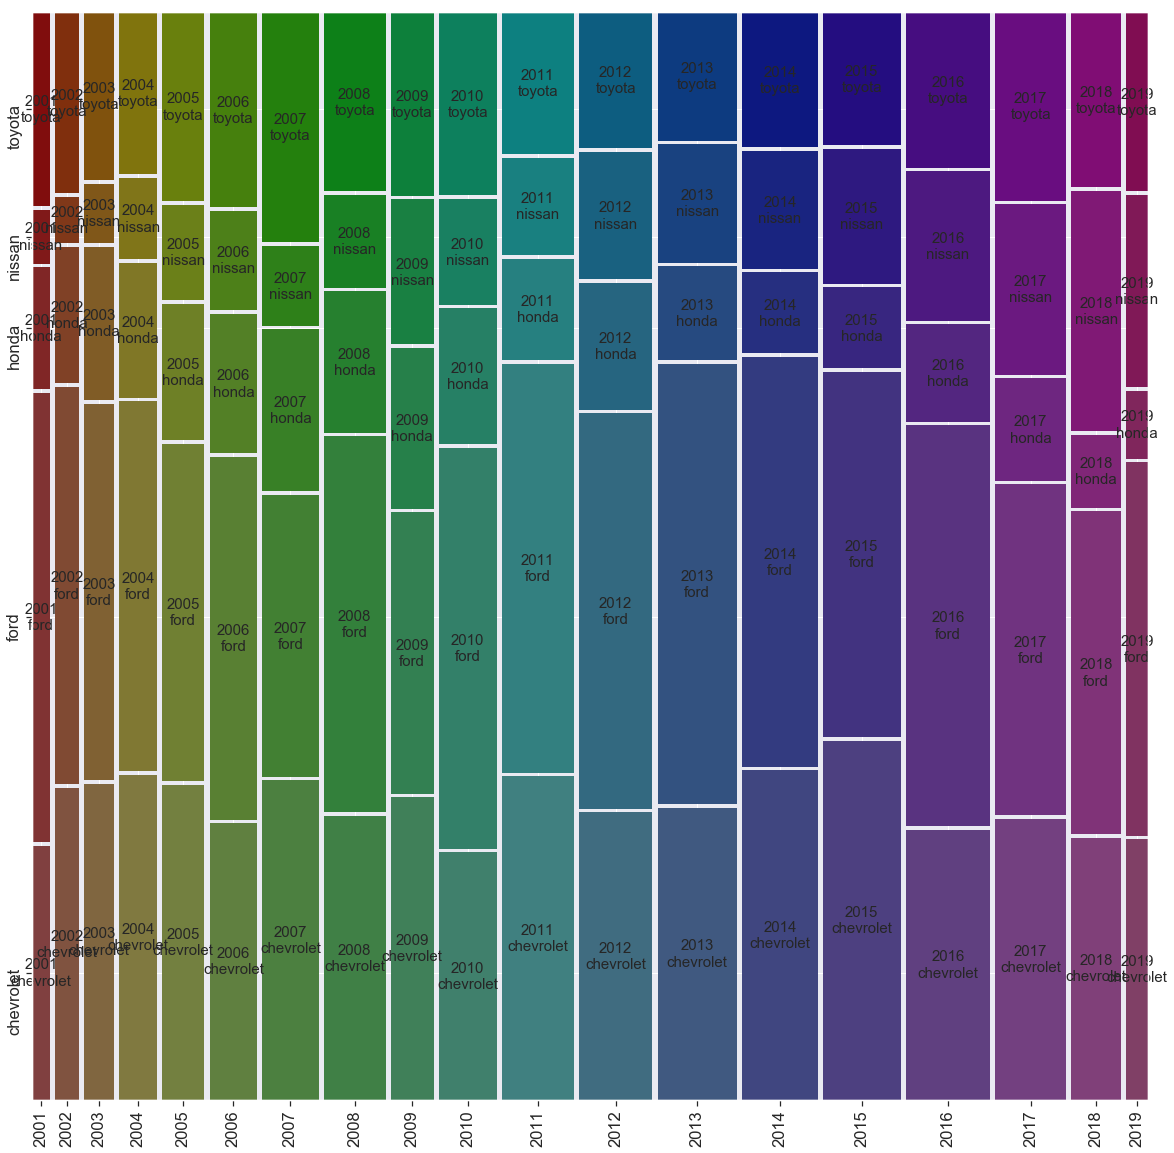

In [674]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [20, 20]
sns.set(font_scale=1.5)
mosaic(df2,gap=0.005, label_rotation=90.0)


plt.show()

### Price distribution of the most popular five manufacturers in 2019 

In [675]:
#filter the year of 2019
five_car_2019=clean_data[clean_data['year']==2019]
five_car_2019.head(5)

#filter the manufacturers
five_car_2019=five_car_2019.loc[(five_car_2019['manufacturer']=='ford')|(five_car_2019['manufacturer']=='chevrolet')|(five_car_2019['manufacturer']=='toyota')|(five_car_2019['manufacturer']=='nissan')|(five_car_2019['manufacturer']=='honda')]
five_car_2019.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
402767,7047779064,dayton / springfield,9377,2019,chevrolet,corvette,excellent,8302.000000,clean,automatic,rwd,yellow,low odometer,low price
383925,7041233232,syracuse,22995,2019,chevrolet,express 2500,like new,14000.000000,clean,automatic,4wd,white,low odometer,medium price
277758,7043861060,central michigan,28995,2019,ford,f-150,excellent,101729.961515,clean,automatic,4wd,white,medium odometer,high price
265771,7046221439,southern maryland,9377,2019,ford,escape,excellent,25246.000000,clean,automatic,4wd,white,low odometer,low price
278471,7049704577,detroit metro,9377,2019,chevrolet,silverado 1500 ld,excellent,101729.961515,clean,automatic,4wd,white,medium odometer,low price


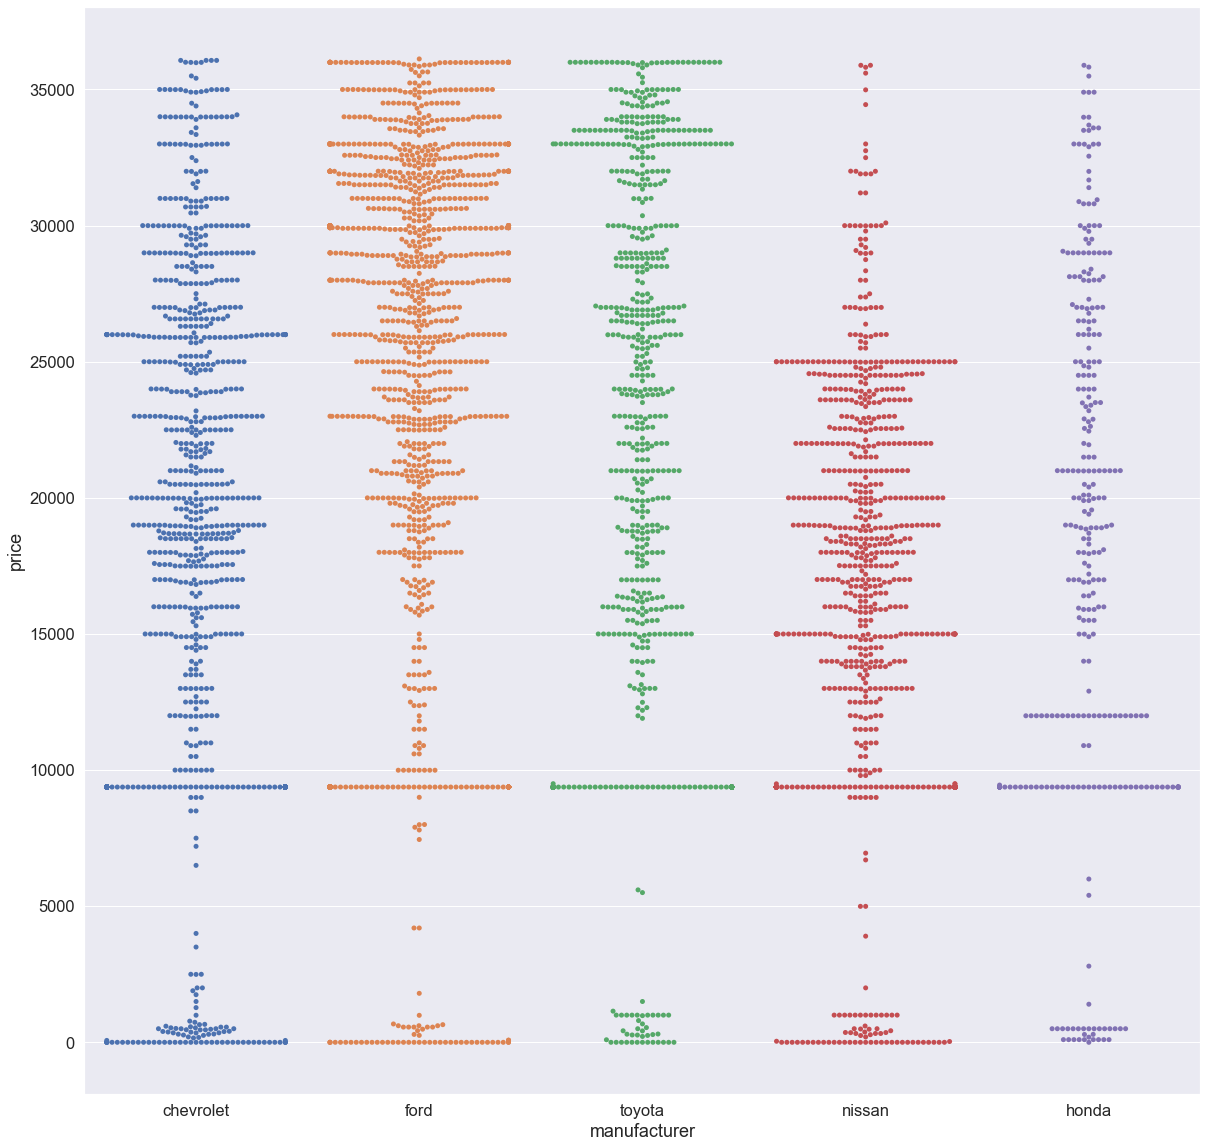

In [676]:
sns.set(font_scale=1.5)
sns.swarmplot(x= 'manufacturer',y='price',data=five_car_2019)

plt.show()

### Compare the condition, price class and odometer class of the most popular five manufacturers in 2019

In [677]:
five_car_2019.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
402767,7047779064,dayton / springfield,9377,2019,chevrolet,corvette,excellent,8302.000000,clean,automatic,rwd,yellow,low odometer,low price
383925,7041233232,syracuse,22995,2019,chevrolet,express 2500,like new,14000.000000,clean,automatic,4wd,white,low odometer,medium price
277758,7043861060,central michigan,28995,2019,ford,f-150,excellent,101729.961515,clean,automatic,4wd,white,medium odometer,high price
265771,7046221439,southern maryland,9377,2019,ford,escape,excellent,25246.000000,clean,automatic,4wd,white,low odometer,low price
278471,7049704577,detroit metro,9377,2019,chevrolet,silverado 1500 ld,excellent,101729.961515,clean,automatic,4wd,white,medium odometer,low price


In [678]:
#2019 car condition
pd.DataFrame(five_car_2019.condition.value_counts())

,condition
excellent,3717
like new,511
good,395
new,121
salvage,2
fair,1


In [679]:
#2019 car condition percentage
pd.DataFrame(five_car_2019.condition.value_counts(normalize=True))

,condition
excellent,0.783021
like new,0.107647
good,0.083210
new,0.025490
salvage,0.000421
fair,0.000211


In [680]:
#2019 car price_class percentage
pd.DataFrame(five_car_2019.price_class.value_counts(normalize=True))

,price_class
high price,0.350537
low price,0.348009
medium price,0.301454


In [681]:
#ford price_class
pd.DataFrame(five_car_2019.price_class.value_counts())

,price_class
high price,1664
low price,1652
medium price,1431


In [682]:
#price_class and condition
bycondition=five_car_2019.groupby('condition').price_class.value_counts(normalize=True)

In [683]:
bycondition

condition  price_class 
excellent  low price       0.364541
           high price      0.351628
           medium price    0.283831
fair       low price       1.000000
good       high price      0.453165
           low price       0.316456
           medium price    0.230380
like new   medium price    0.493151
           high price      0.295499
           low price       0.211350
new        low price       0.512397
           medium price    0.264463
           high price      0.223140
salvage    low price       0.500000
           medium price    0.500000
Name: price_class, dtype: float64

In [684]:
#price_class, condition and odometer
byodometer=five_car_2019.groupby(['condition','odometer_class']).price_class.value_counts(normalize=True)

In [685]:
byodometer

condition  odometer_class   price_class 
excellent  low odometer     low price       0.378669
                            high price      0.334638
                            medium price    0.286693
           medium odometer  high price      0.431644
                            low price       0.298003
                            medium price    0.270353
fair       low odometer     low price       1.000000
good       high odometer    low price       1.000000
           low odometer     high price      0.473404
                            low price       0.287234
                            medium price    0.239362
           medium odometer  low price       0.888889
                            high price      0.055556
                            medium price    0.055556
like new   low odometer     medium price    0.473563
                            high price      0.310345
                            low price       0.216092
           medium odometer  medium price    0.605263
     

<Figure size 576x720 with 0 Axes>

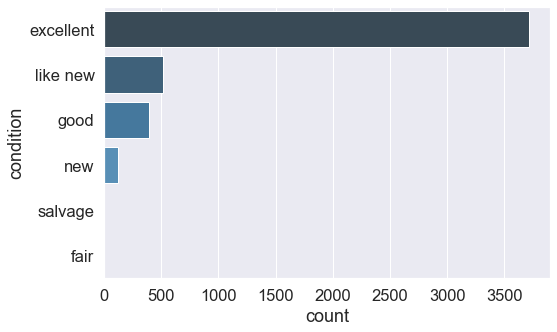

In [716]:
sns.set(font_scale=1.5)
sns.despine()
plt.figure(figsize=(8,5))
sns.countplot(y='condition',data=five_car_2019,palette="Blues_d")
plt.show()

<Figure size 576x720 with 0 Axes>

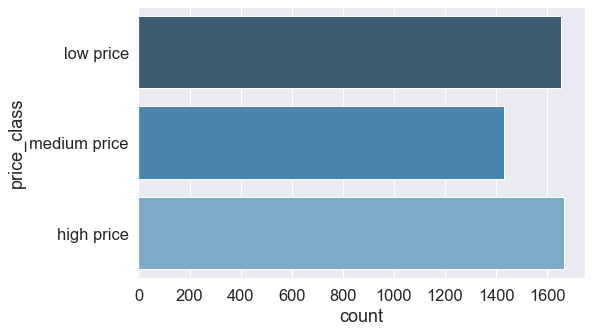

In [715]:
sns.set(font_scale=1.5)
sns.despine()
plt.figure(figsize=(8,5))
sns.countplot(y='price_class',data=five_car_2019,palette="Blues_d")
plt.show()

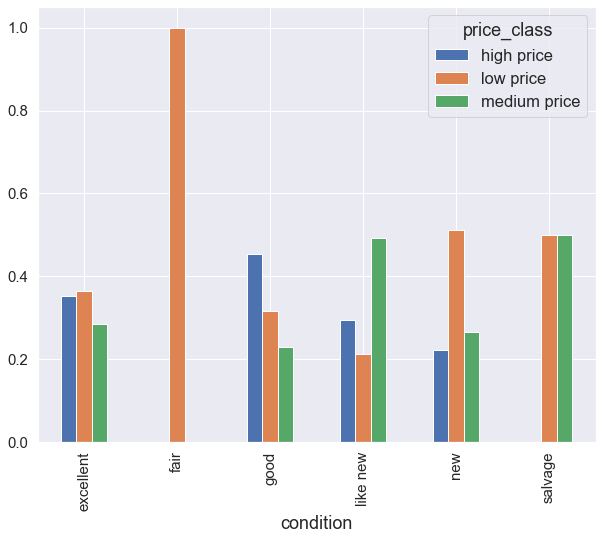

In [856]:
bycondition.unstack().plot(kind='bar',figsize=(10,8),fontsize= 15)


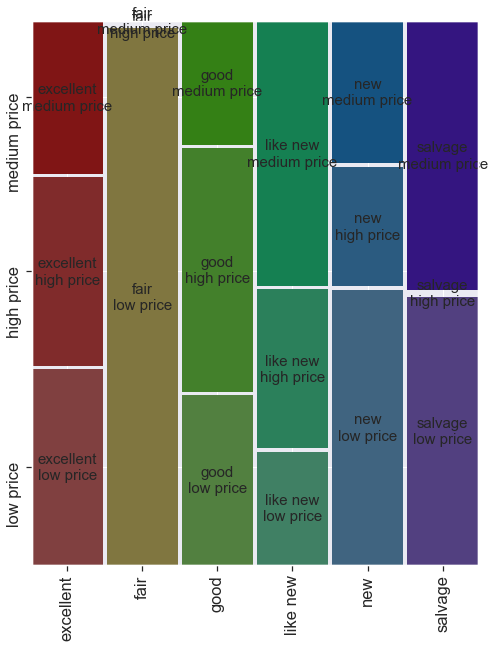

In [688]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set(font_scale=1.5)
mosaic(bycondition,gap=0.01, label_rotation=90.0)

plt.show()

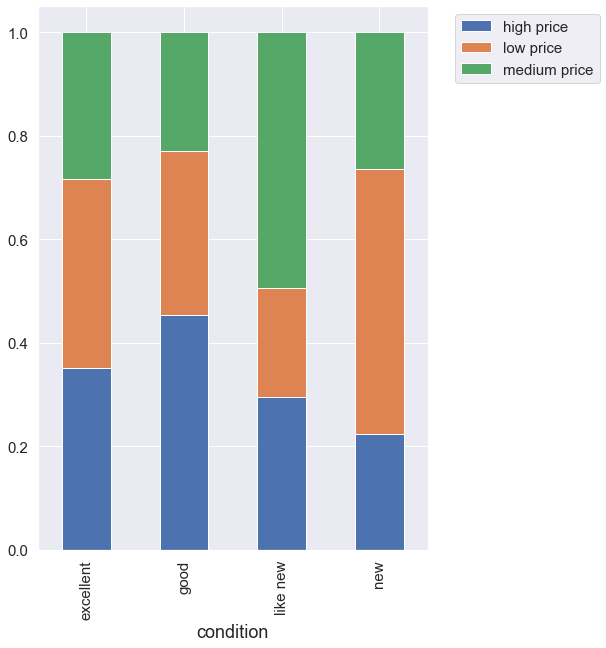

In [732]:
_=bycondition.unstack().dropna().plot(kind='bar',figsize=(7, 10),stacked=True,fontsize= 15)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

<Figure size 720x576 with 0 Axes>

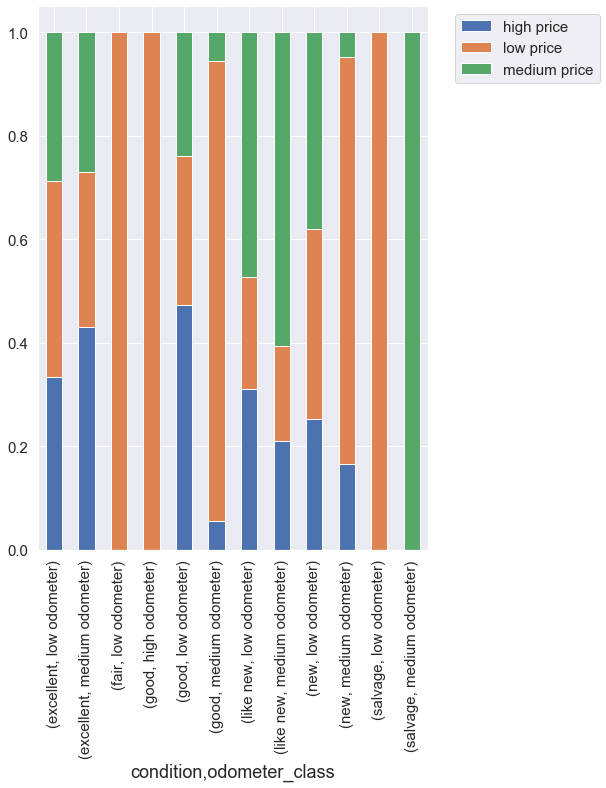

In [717]:
plt.figure(figsize=(10,8))
_=byodometer.unstack().plot(kind='bar',stacked=True,figsize=(7, 10),fontsize= 15)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

## analysis each manufacturer data of the past 20 years

In [691]:
# the data of past 20 years
data_20=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
data_20.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
330326,7041839309,eastern NC,9377,2013,lexus,rx 450h,excellent,96996.000000,clean,automatic,fwd,yellow,low odometer,low price
225061,7046980271,indianapolis,3850,2011,chevrolet,cruze,excellent,101729.961515,clean,automatic,4wd,yellow,medium odometer,low price
156725,7036994153,daytona beach,19300,2016,ford,mustang ecoboost premium,good,52408.000000,clean,automatic,rwd,yellow,low odometer,medium price
373315,7033048430,hudson valley,15950,2016,volkswagen,beetle,excellent,43355.000000,clean,automatic,4wd,yellow,low odometer,medium price
32151,7033518700,yakima,24999,2008,gmc,sierra 2500 hd slt 4x4 gas,excellent,102259.000000,clean,automatic,4wd,yellow,medium odometer,high price


In [692]:
# all the manufacturers
data_20['manufacturer']

330326         lexus
225061     chevrolet
156725          ford
373315    volkswagen
32151            gmc
             ...    
61176          acura
61181          acura
199957    volkswagen
61189           mini
509576           ram
Name: manufacturer, Length: 448001, dtype: object

### * Ford data of past 20 years analysis

In [693]:
def price_20(name):
        name_data=data_20[data_20['manufacturer']==name]
        plt.figure(figsize=(10,5))
        sns.despine()
        sns.set(font_scale=1.5)
        plt.xticks(rotation= 90)
        plt.xlabel('Year')
        plt.ylabel('Price')
        sns.lineplot(x=name_data.year, y=name_data.price, ci=None)
        plt.show()

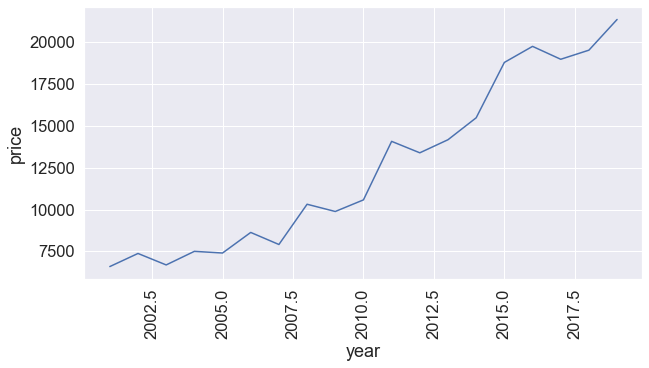

In [694]:
# ford price trend
price_20('ford')  

In [695]:
# get a function of paint color, model, condition, price class, odometer class
def manu_20(name):
        name_data=data_20[data_20['manufacturer']==name]
        plt.figure(figsize=(5, 5))
        d1=name_data.paint_color.value_counts()
        d2=name_data.model.value_counts(normalize=True).head(10)
        d3=name_data.condition.value_counts()
        d4=name_data.price_class.value_counts()
        d5=name_data.odometer_class.value_counts()
        d6=name_data.drive.value_counts()
        
        colors=['red','yellowgreen','lightskyblue','C0','C1']
        plt.figure(figsize=(15,15))
       
        plt.subplot(3,2,1);d1.plot(kind='bar',color=['C0','C1'],fontsize= 15);plt.title('paint color')
        plt.subplot(3,2,2);d2.plot(kind='bar',color=['C2','C3'],fontsize= 15);plt.title('model')
        plt.subplot(3,2,3);d3.plot(kind='pie',fontsize= 15)
        plt.subplot(3,2,4);d4.plot(kind='pie',fontsize= 15)
        plt.subplot(3,2,5);d5.plot(kind='pie',fontsize= 15)
        plt.subplot(3,2,6);d6.plot(kind='pie',fontsize= 15)

       

<Figure size 360x360 with 0 Axes>

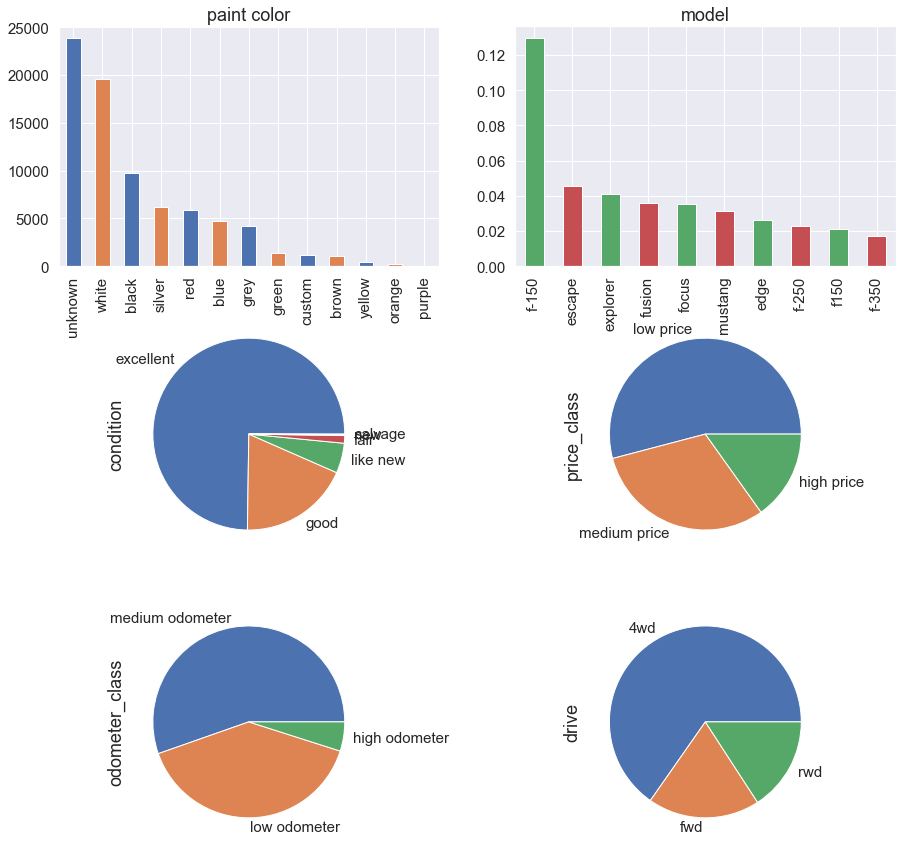

In [696]:
manu_20('ford')  


In [757]:
# the distrubution of condition and price class
def by_condition_price(name):
    n=data_20[data_20['manufacturer']==name]
    n=n.groupby(['condition']).price_class.value_counts(normalize=True)
   
    _=n.unstack().plot(kind='bar',figsize=(8,10),fontsize= 15,title=('condition'))
    _.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

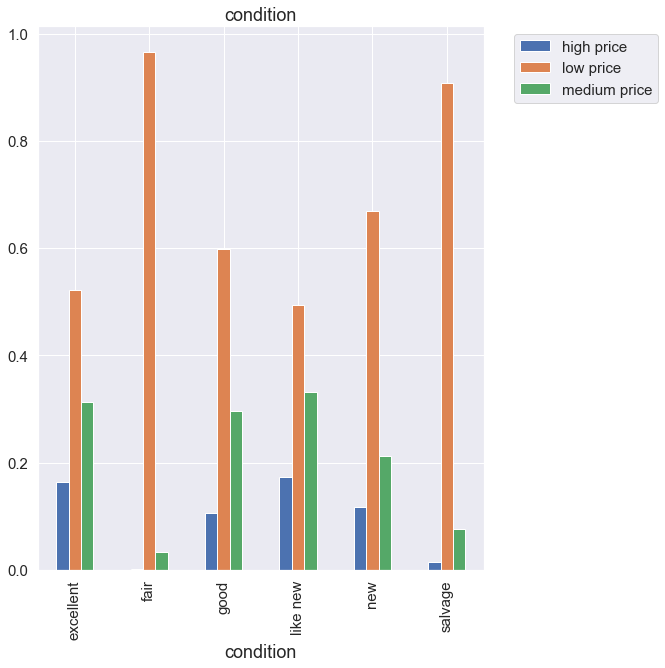

In [758]:
by_condition_price('ford')


In [779]:
# the distrubution of condition, price class and odometer
def by_condition_odometer_price(name):
    n=data_20[data_20['manufacturer']==name]
    n=n.groupby(['condition','odometer_class']).price_class.value_counts(normalize=True)
    _=n.unstack().plot(kind='bar',stacked=False,figsize=(8,10),fontsize= 15,title=('condition'))
    _.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

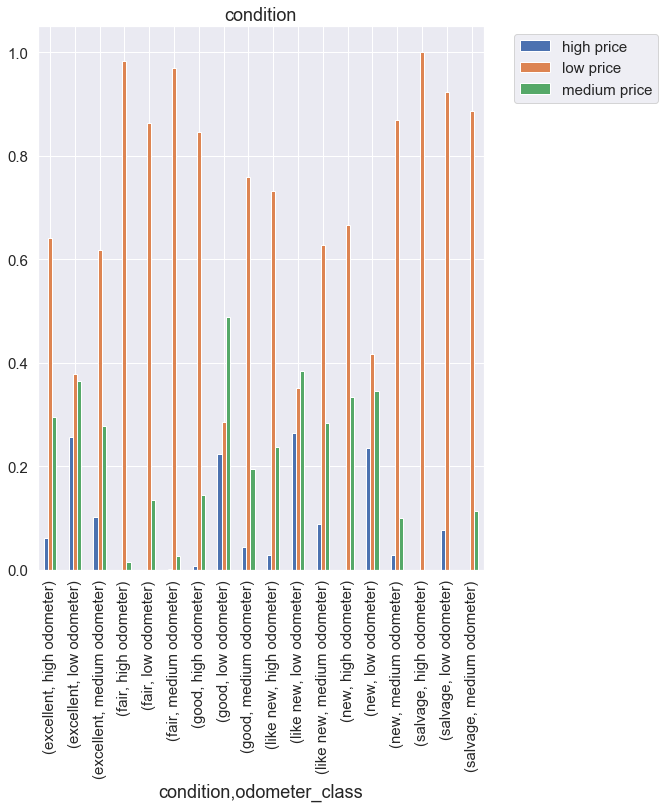

In [780]:
by_condition_odometer_price('ford')

In [781]:
# the price trend
def price_model_20(name):
        name_data=data_20[data_20['model']==name]
        plt.figure(figsize=(10,5))
        sns.despine()
        sns.set(font_scale=1.5)
        plt.xticks(rotation= 90)
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.title('Price Trend' )
        sns.lineplot(x=name_data.year, y=name_data.price, ci=None)
        plt.show()

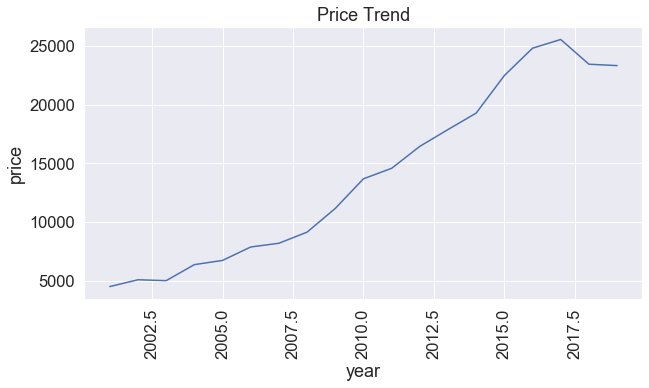

In [782]:
price_model_20('f-150')

In [783]:
# the data of one model
def model_20(name):
        name_data=data_20[data_20['model']==name]
        plt.figure(figsize=(5, 5))
        t1=name_data.condition.value_counts()
        t2=name_data.price_class.value_counts()
        t3=name_data.odometer_class.value_counts()
        
  
        plt.figure(figsize=(15,15))
       
        plt.subplot(2,2,1);t1.plot(kind='pie',fontsize= 15)
        plt.subplot(2,2,2);t2.plot(kind='bar',fontsize= 15)
        plt.subplot(2,2,3);t3.plot(kind='pie',fontsize= 15)

<Figure size 360x360 with 0 Axes>

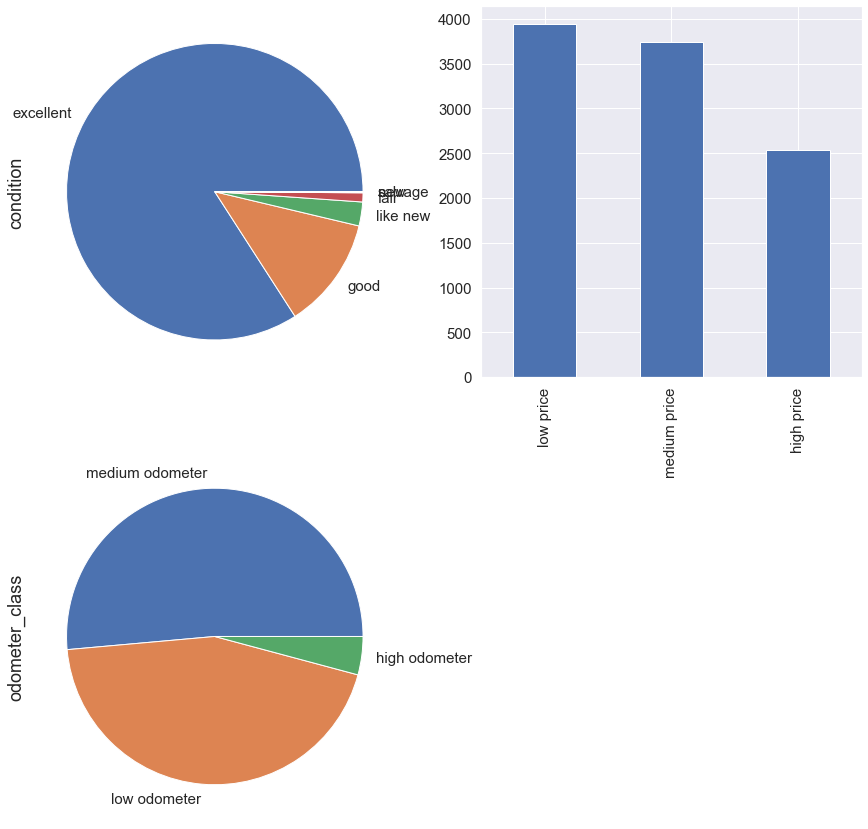

In [784]:
model_20('f-150')

### * chevrolet data of past 20 years analysis

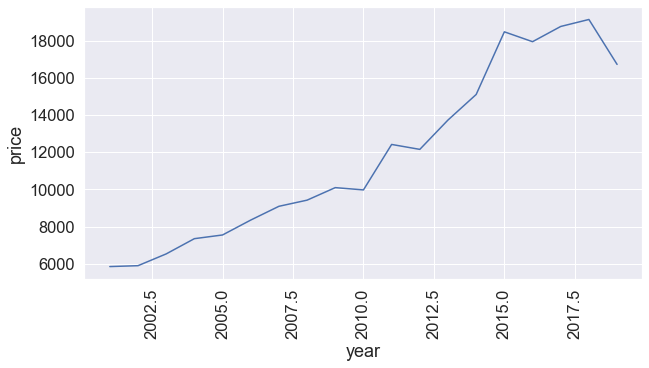

<Figure size 360x360 with 0 Axes>

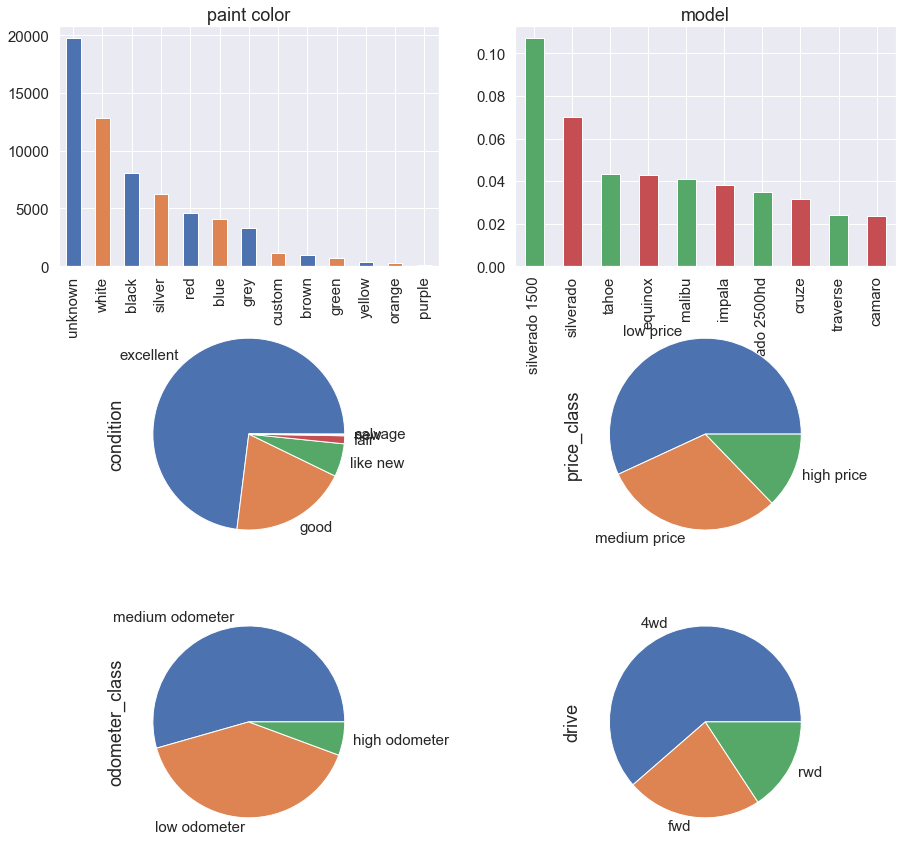

In [785]:
price_20('chevrolet') 
manu_20('chevrolet')

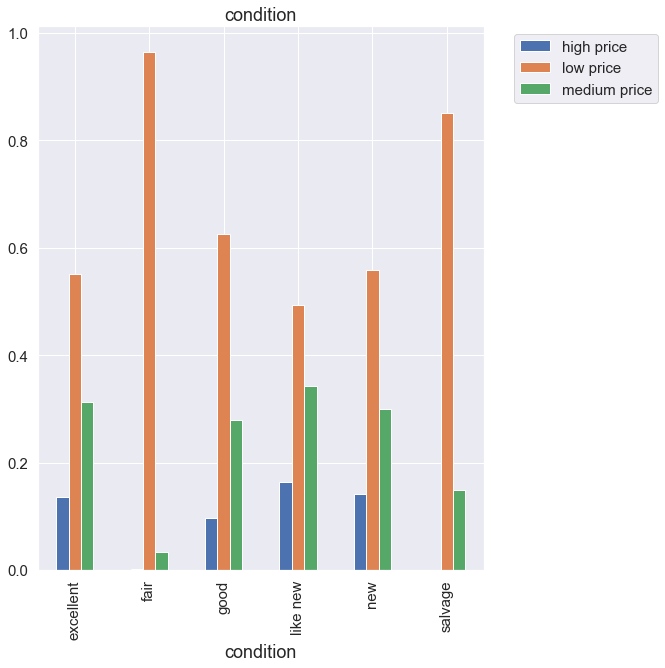

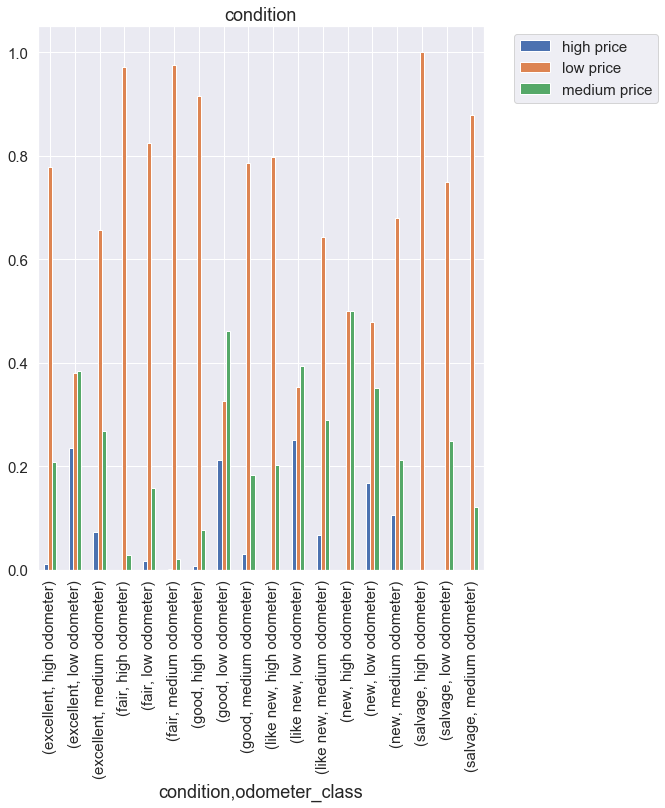

In [786]:
by_condition_price('chevrolet')
by_condition_odometer_price('chevrolet')

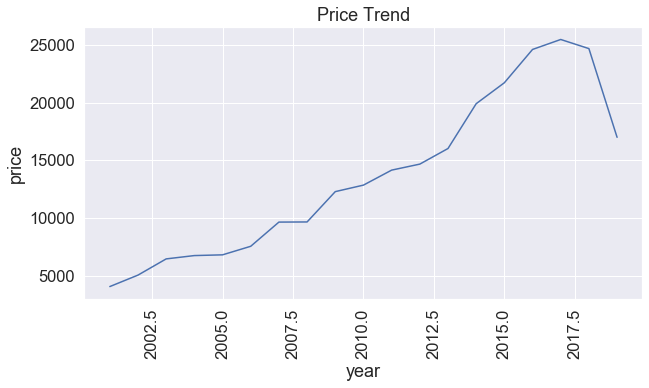

<Figure size 360x360 with 0 Axes>

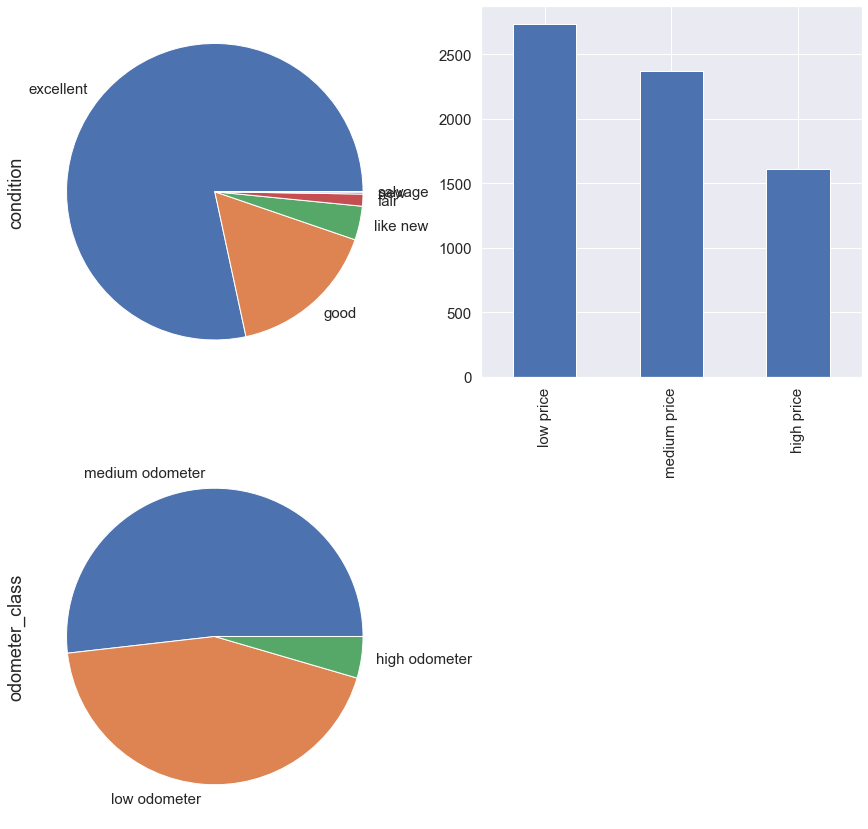

In [787]:
price_model_20('silverado 1500')
model_20('silverado 1500')

### * toyota data of past 20 years analysis

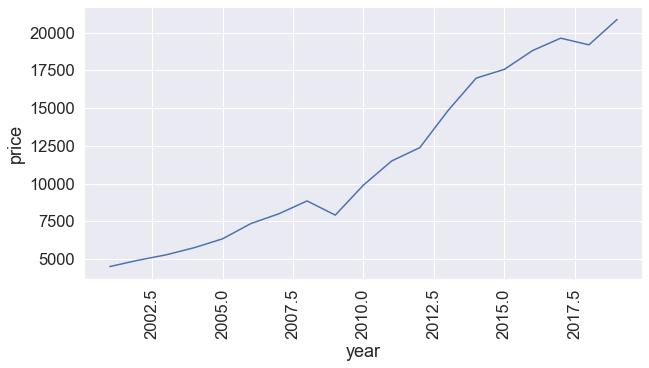

<Figure size 360x360 with 0 Axes>

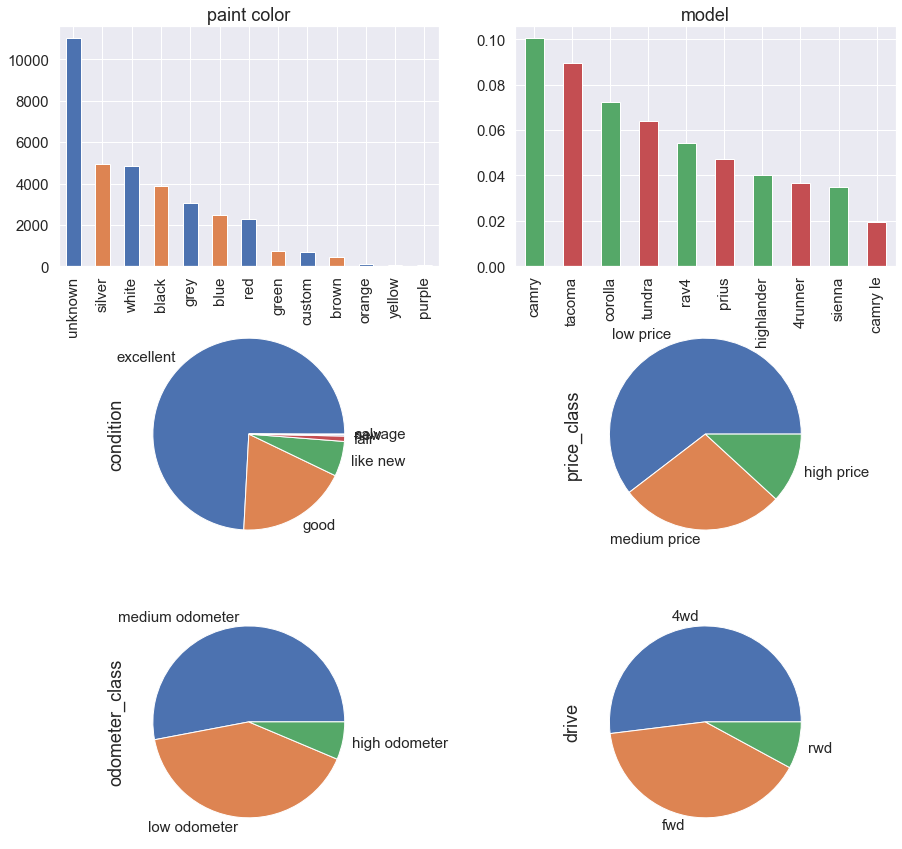

In [788]:
price_20('toyota') 
manu_20('toyota')

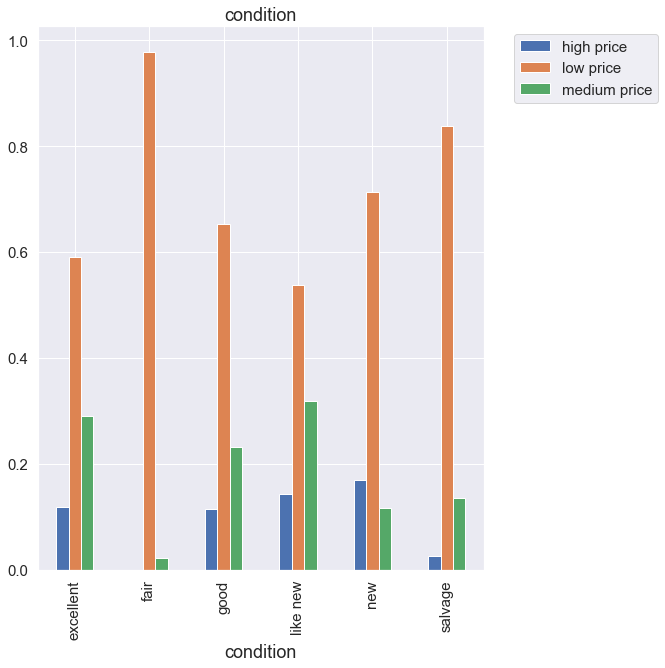

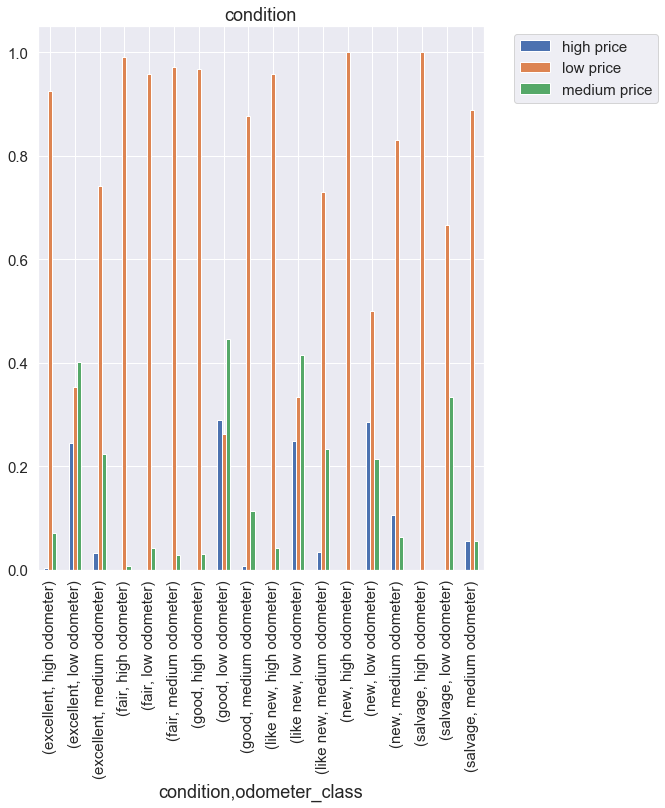

In [789]:

by_condition_price('toyota')
by_condition_odometer_price('toyota')

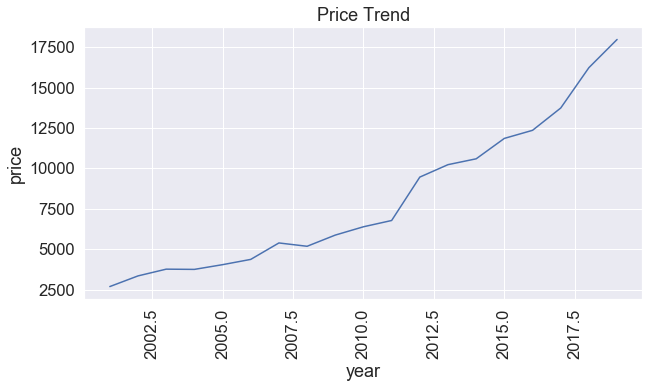

<Figure size 360x360 with 0 Axes>

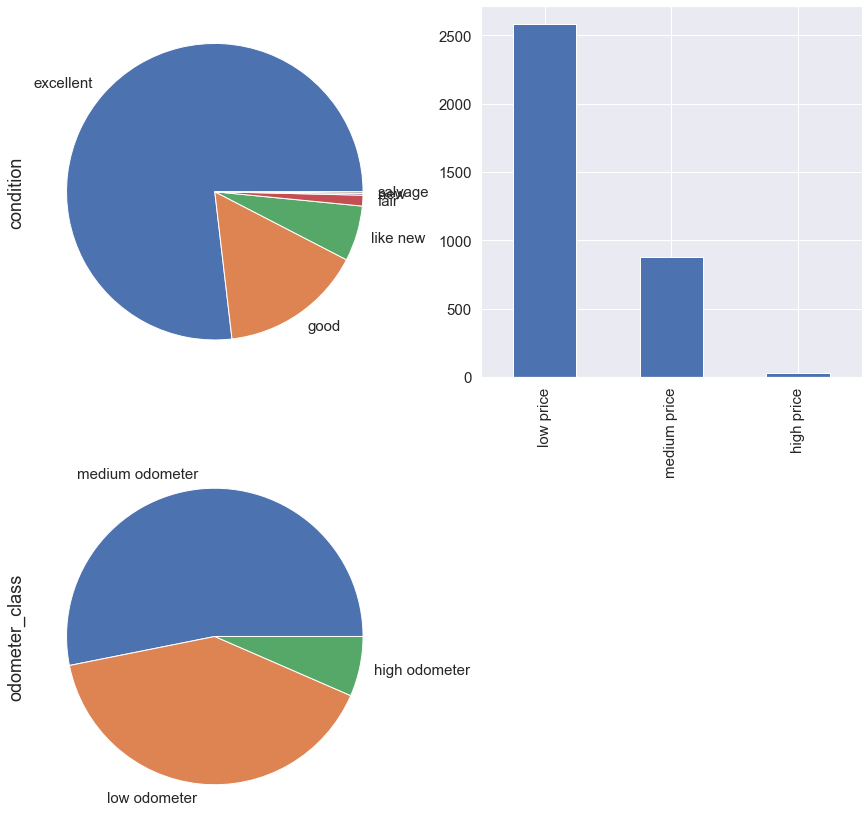

In [790]:
price_model_20('camry')
model_20('camry')

### * nissan data of past 20 years analysis

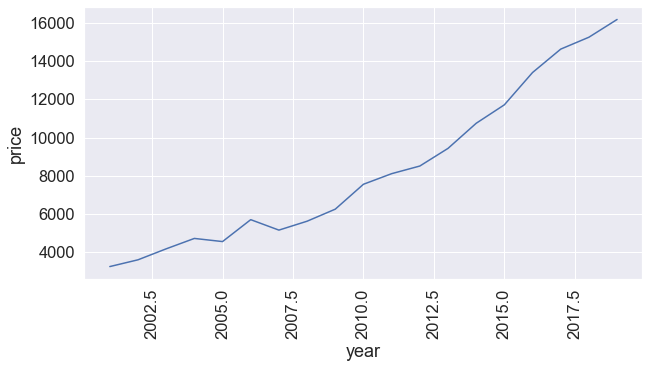

<Figure size 360x360 with 0 Axes>

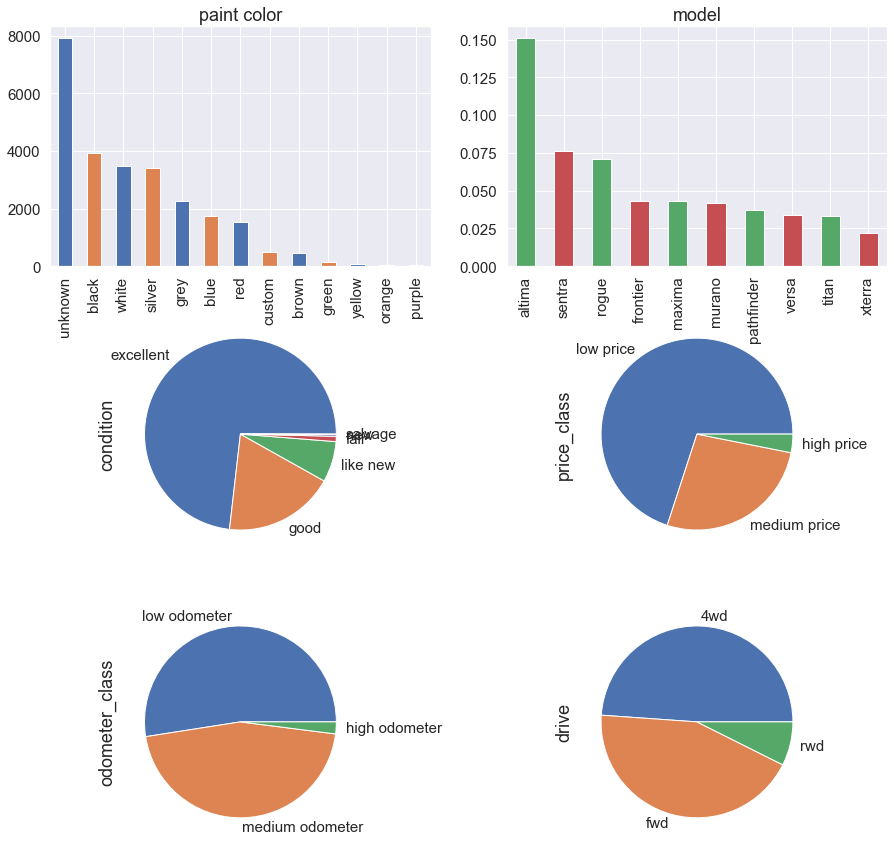

In [791]:
price_20('nissan') 
manu_20('nissan')

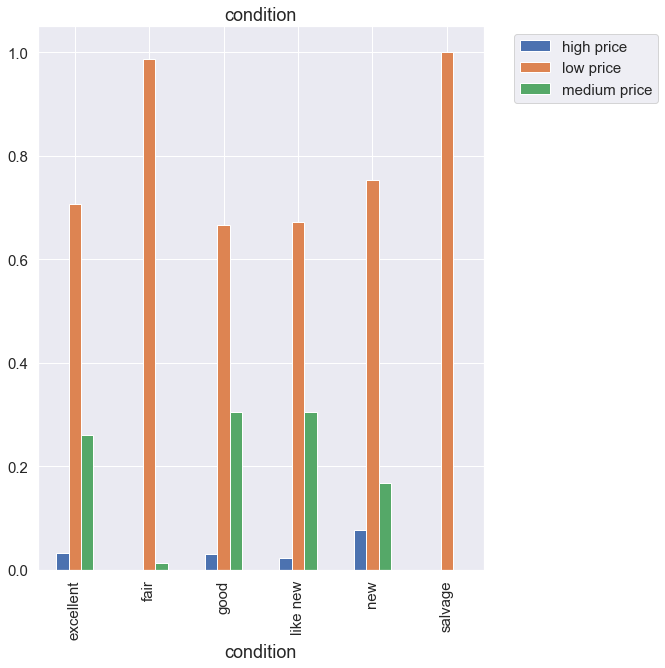

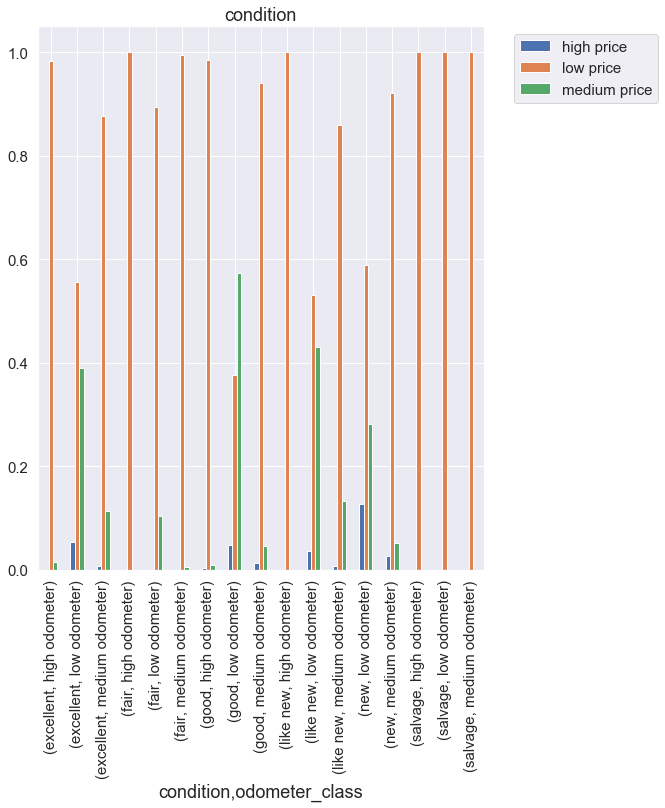

In [792]:

by_condition_price('nissan')
by_condition_odometer_price('nissan')

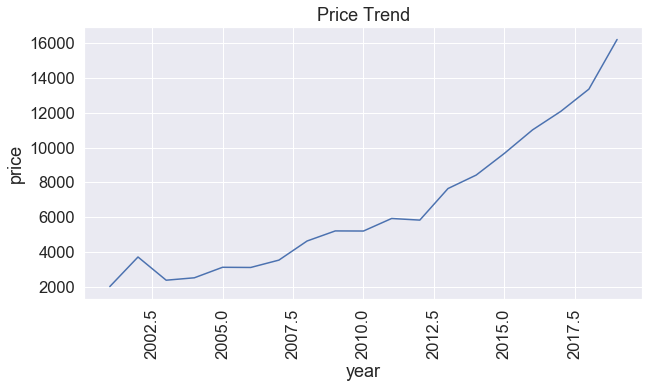

<Figure size 360x360 with 0 Axes>

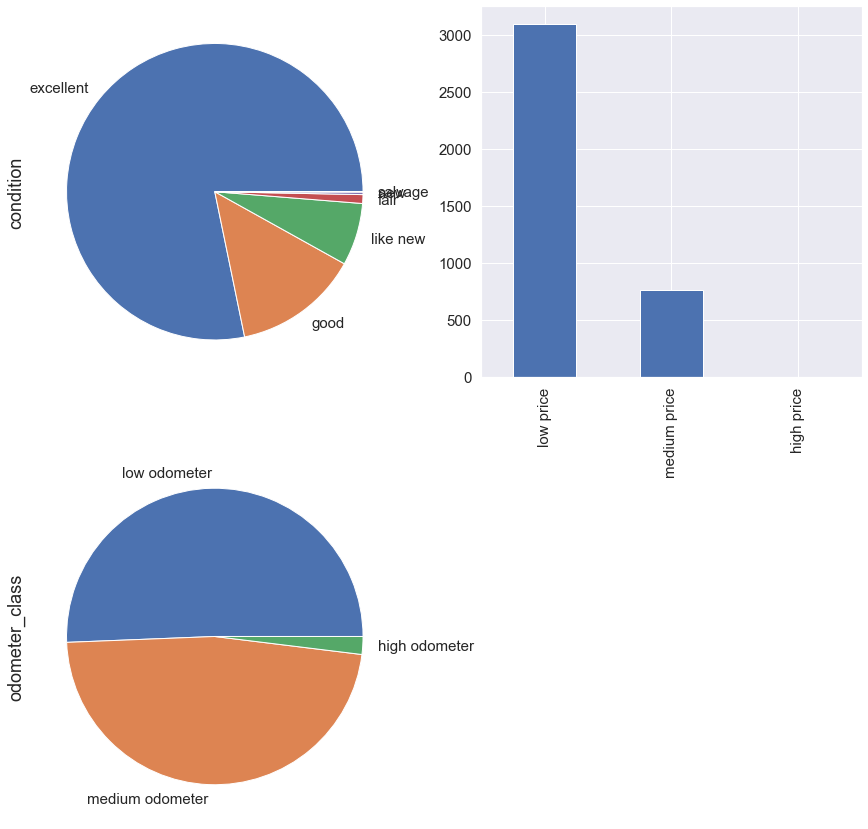

In [793]:
price_model_20('altima')
model_20('altima')

### * Honda' data of past 20 years analysis

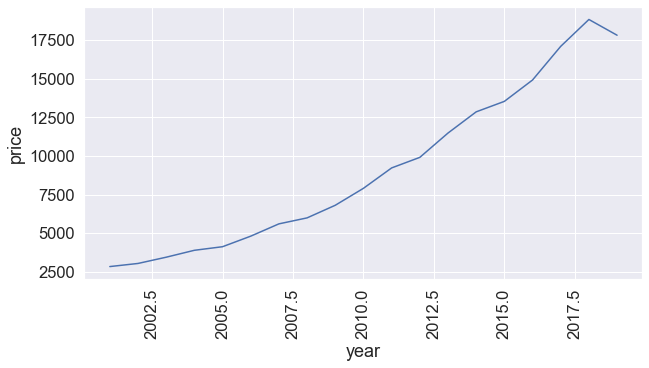

<Figure size 360x360 with 0 Axes>

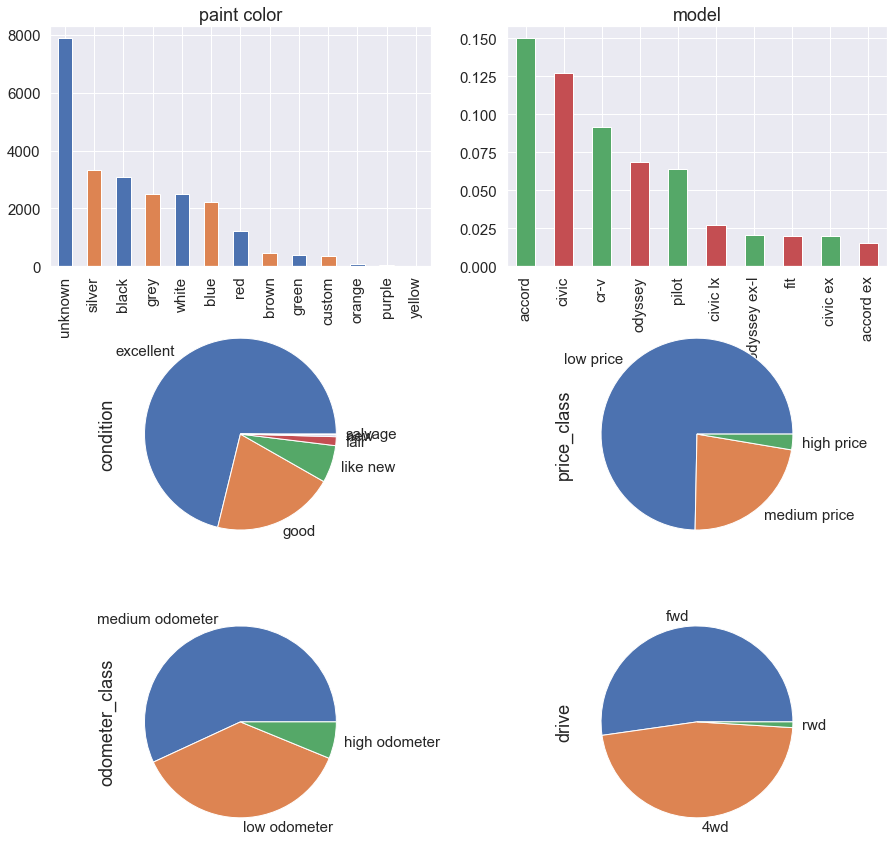

In [794]:
price_20('honda') 
manu_20('honda')

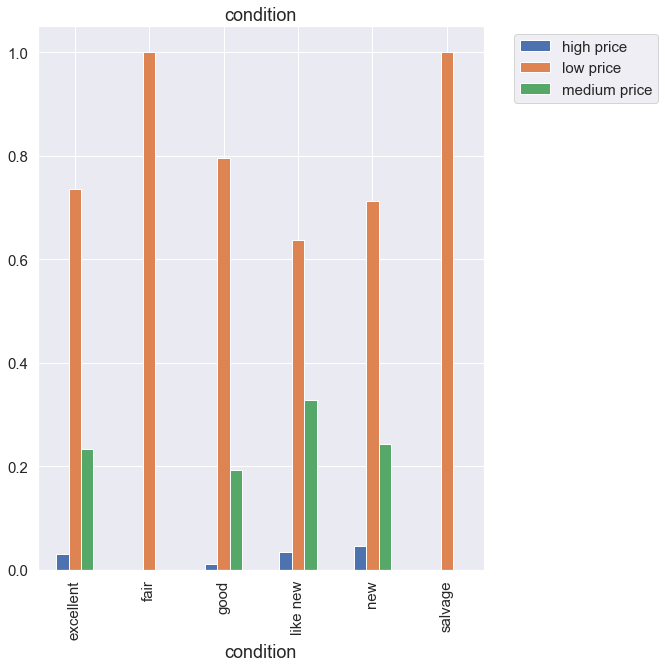

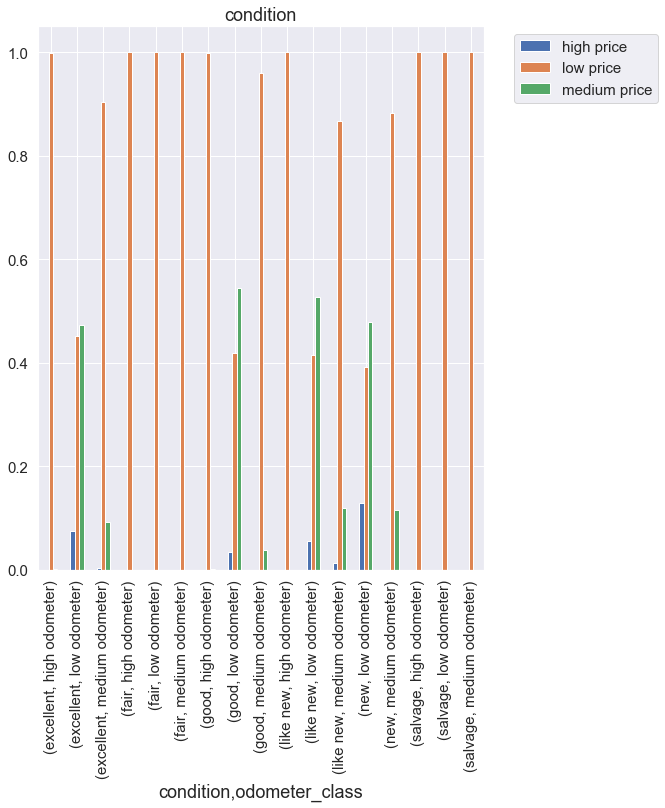

In [799]:
by_condition_price('honda')
by_condition_odometer_price('honda')

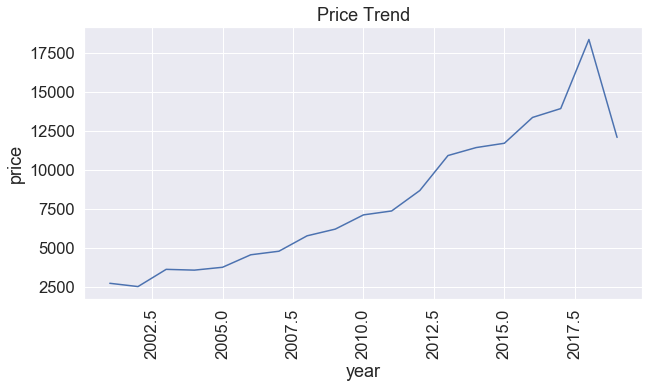

<Figure size 360x360 with 0 Axes>

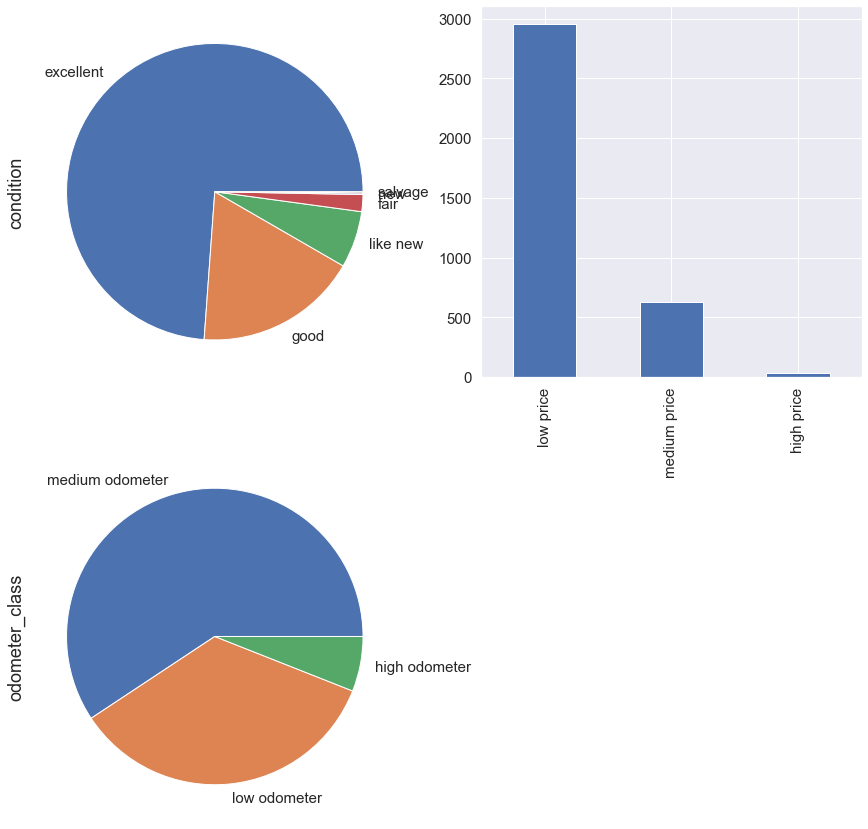

In [800]:
price_model_20('accord')
model_20('accord')

### average price of the 5 manufacturers

In [844]:
#campare the mean price of the five manufacturer
five_mean_20=df.loc[(five_car_20['manufacturer']=='ford')|(df['manufacturer']=='chevrolet')|(df['manufacturer']=='toyota')|(df['manufacturer']=='nissan')|(df['manufacturer']=='honda')]
df.head(5)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class,price_class
225061,7046980271,indianapolis,3850,2011,chevrolet,cruze,excellent,101729.961515,clean,automatic,4wd,yellow,medium odometer,low price
156725,7036994153,daytona beach,19300,2016,ford,mustang ecoboost premium,good,52408.000000,clean,automatic,rwd,yellow,low odometer,medium price
136199,7049522243,denver,15590,2018,ford,escape,excellent,21636.000000,clean,automatic,fwd,yellow,low odometer,medium price
365636,7037074377,albany,19997,2002,ford,f-150,excellent,65035.000000,clean,automatic,4wd,yellow,low odometer,medium price
104460,7049359877,redding,11985,2006,chevrolet,corvette,excellent,160175.000000,clean,automatic,rwd,yellow,medium odometer,low price


In [845]:
five_price_mean_20=five_mean_20.groupby('manufacturer').price.mean().sort_values()

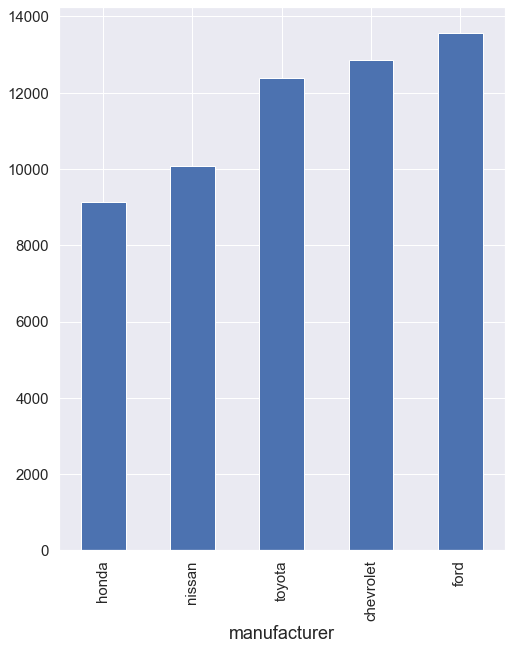

In [846]:
five_price_mean_20.plot(kind='bar',figsize=(8, 10),fontsize= 15)

In [850]:
#campare the mean price of the five manufacturer with different odo class
five_counts_20=five_mean_20.groupby(['manufacturer','odometer_class']).price.mean()

In [851]:
five_counts_20

manufacturer  odometer_class 
chevrolet     high odometer       7566.850793
              low odometer       16841.332934
              medium odometer    10486.101884
ford          high odometer       8941.542968
              low odometer       17198.760004
              medium odometer    11388.161227
honda         high odometer       3648.812332
              low odometer       13609.777403
              medium odometer     6814.988620
nissan        high odometer       4213.384016
              low odometer       12856.310239
              medium odometer     7164.256875
toyota        high odometer       6004.234439
              low odometer       17340.886359
              medium odometer     9349.684491
Name: price, dtype: float64

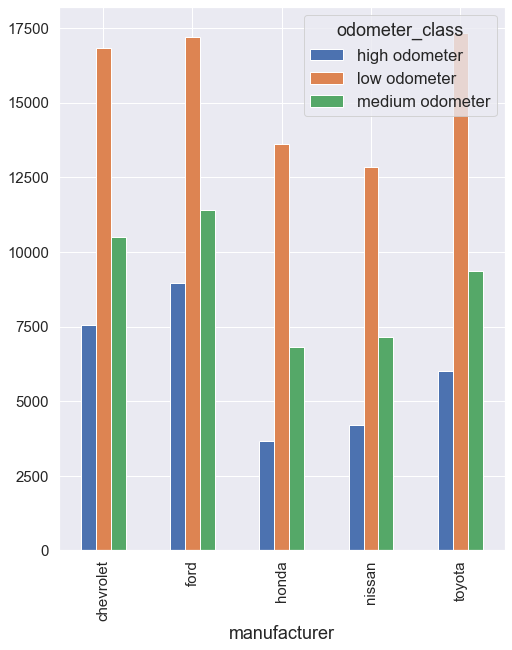

In [854]:
five_counts_20.unstack().plot(kind='bar',figsize=(8, 10),fontsize= 15)

## 3.1 digital processing